In [83]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import math
import logging
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import difflib
import heapq
from collections import defaultdict
from itertools import product, combinations

## Importing of CSV and reading the data

In [84]:
port_distances = pd.read_csv("/Port Distances.csv")
port_distances.columns

Index(['PORT_NAME_FROM', 'PORT_NAME_TO', 'DISTANCE'], dtype='object')

In [85]:
port_distances.shape

(15533, 3)

In [86]:
# To access a column in csv with pandas
# port_distances["columnName"]

In [87]:
market_vessels = pd.read_csv("/Market_Vessels.csv")
market_vessels.head()

,Vessel Name,DWT_MT,Warranted_Speed_Laden_kn,Warranted_Speed_Ballast_kn,Warranted_VLSF_Laden_mt_per_day,Warranted_MGO_Laden_mt_per_day,Warranted_VLSF_Ballast_mt_per_day,Warranted_MGO_Ballast_mt_per_day,Economical_Speed_Laden_kn,Economical_Speed_Ballast_kn,...,Economical_MGO_Laden_mt_per_day,Economical_VLSF_Ballast_mt_per_day,Economical_MGO_Ballast_mt_per_day,Port_Consumption_Idle_VLSF_mt_per_day,Port_Consumption_Working_VLSF_mt_per_day,Current_Discharge_Port,Current_Discharge_Country,ETD,Bunker_Remaining_VLSF_mt,Bunker_Remaining_MGO_mt
0,ATLANTIC FORTUNE,181200,13.8,14.6,60,2.0,56.0,2.0,12.3,12.9,...,2.0,39.5,2.0,2.0,3.0,Paradip,India,2/3/2026,512.4,38.9
1,PACIFIC VANGUARD,182050,13.6,14.3,59,1.9,54.0,1.9,12.0,12.5,...,1.9,38.0,1.9,1.9,3.0,Caofeidian,China,26/2/2026,420.3,51.0
2,CORAL EMPEROR,180450,13.4,14.1,58,2.0,53.0,2.0,11.9,12.3,...,2.0,36.5,2.0,2.0,3.1,Rotterdam,Netherlands,5/3/2026,601.7,42.3
3,EVEREST OCEAN,179950,13.7,14.5,61,1.8,56.5,1.8,12.4,12.8,...,1.8,39.0,1.8,1.8,3.0,Xiamen,China,3/3/2026,478.2,56.4
4,POLARIS SPIRIT,181600,13.9,14.7,62,1.9,57.0,1.9,12.5,13.0,...,1.9,40.0,1.9,2.0,3.1,Kandla,India,28/2/2026,529.8,47.1


In [88]:
market_vessels.columns

Index(['Vessel Name', 'DWT_MT', 'Warranted_Speed_Laden_kn',
       'Warranted_Speed_Ballast_kn', 'Warranted_VLSF_Laden_mt_per_day',
       'Warranted_MGO_Laden_mt_per_day', 'Warranted_VLSF_Ballast_mt_per_day',
       'Warranted_MGO_Ballast_mt_per_day', 'Economical_Speed_Laden_kn',
       'Economical_Speed_Ballast_kn', 'Economical_VLSF_Laden_mt_per_day',
       'Economical_MGO_Laden_mt_per_day', 'Economical_VLSF_Ballast_mt_per_day',
       'Economical_MGO_Ballast_mt_per_day',
       'Port_Consumption_Idle_VLSF_mt_per_day',
       'Port_Consumption_Working_VLSF_mt_per_day', 'Current_Discharge_Port',
       'Current_Discharge_Country', 'ETD', 'Bunker_Remaining_VLSF_mt',
       'Bunker_Remaining_MGO_mt'],
      dtype='object')

In [89]:
cargill_vessels = pd.read_csv("/Cargill_Capesize_Vessels.csv")
cargill_vessels.head()

,Vessel Name,DWT_MT,Hire_Rate_USD_per_day,Warranted_Speed_Laden_kn,Warranted_Speed_Ballast_kn,Warranted_VLSF_Laden_mt_per_day,Warranted_MGO_Laden_mt_per_day,Warranted_VLSF_Ballast_mt_per_day,Warranted_MGO_Ballast_mt_per_day,Economical_Speed_Laden_kn,...,Economical_MGO_Laden_mt_per_day,Economical_VLSF_Ballast_mt_per_day,Economical_MGO_Ballast_mt_per_day,Port_Consumption_Idle_VLSF_mt_per_day,Port_Consumption_Working_VLSF_mt_per_day,Current_Discharge_Port,Current_Discharge_Country,ETD,Bunker_Remaining_VLSF_mt,Bunker_Remaining_MGO_mt
0,ANN BELL,180803,11750,13.5,14.5,60,2.0,55.0,2.0,12.0,...,2.0,38.0,2.0,2.0,3.0,Qingdao,China,25/2/2026,401.3,45.1
1,OCEAN HORIZON,181550,15750,13.8,14.8,61,1.8,56.5,1.8,12.3,...,1.8,39.5,1.8,1.8,3.2,Map Ta Phut,Thailand,1/3/2026,265.8,64.3
2,PACIFIC GLORY,182320,14800,13.5,14.2,59,1.9,54.0,1.9,12.2,...,1.9,40.0,1.9,2.0,3.0,Gwangyang,S. Korea,10/3/2026,601.9,98.1
3,GOLDEN ASCENT,179965,13950,13.0,14.0,58,2.0,53.0,2.0,11.8,...,2.0,37.0,2.0,1.9,3.1,Fangcheng,China,8/3/2026,793.3,17.1


In [90]:
cargill_vessels.columns

Index(['Vessel Name', 'DWT_MT', 'Hire_Rate_USD_per_day',
       'Warranted_Speed_Laden_kn', 'Warranted_Speed_Ballast_kn',
       'Warranted_VLSF_Laden_mt_per_day', 'Warranted_MGO_Laden_mt_per_day',
       'Warranted_VLSF_Ballast_mt_per_day', 'Warranted_MGO_Ballast_mt_per_day',
       'Economical_Speed_Laden_kn', 'Economical_Speed_Ballast_kn',
       'Economical_VLSF_Laden_mt_per_day', 'Economical_MGO_Laden_mt_per_day',
       'Economical_VLSF_Ballast_mt_per_day',
       'Economical_MGO_Ballast_mt_per_day',
       'Port_Consumption_Idle_VLSF_mt_per_day',
       'Port_Consumption_Working_VLSF_mt_per_day', 'Current_Discharge_Port',
       'Current_Discharge_Country', 'ETD', 'Bunker_Remaining_VLSF_mt',
       'Bunker_Remaining_MGO_mt'],
      dtype='object')

In [91]:
committed_cargoes = pd.read_csv(
    "/Cargill_Committed_Cargoes.csv",
    encoding="latin1"
)
committed_cargoes.head()

,route_full,route_origin,route_destination,customer,commodity,quantity_mt,quantity_tolerance_pct,quantity_notes,laycan_earliest,laycan_latest,...,discharge_port,discharge_country,discharge_port_notes,discharge_terms,discharge_turn_time_hr,load_port_cost_usd,discharge_port_cost_usd,port_cost_notes,commission_pct,commission_payee
0,West Africa - China (Bauxite cargoes),West Africa,China,EGA,Bauxite,180000,10,Owners' Option,2/4/26,10/4/26,...,Qingdao,China,Other Chinese ports allowed on same TCE basis,"25,000",12,0,0,"Nil, borne by Charterer",1.25,broker
1,Australia - China (Iron ore cargoes),Australia,China,BHP,Iron Ore,160000,10,Half freight applies to any cargo loaded in ex...,7/3/26,11/3/26,...,Lianyungang,China,NaN,"30,000",24,260000,120000,NaN,3.75,charterer
2,Brazil - China (Iron ore cargoes),Brazil,China,CSN,Iron Ore,180000,10,MOLOO,1/4/26,8/4/26,...,Qingdao,China,"Qingdao or other ports in the Far East, includ...","30,000",24,75000,90000,NaN,3.75,charterer


In [92]:
committed_cargoes.columns

Index(['route_full', 'route_origin', 'route_destination', 'customer',
       'commodity', 'quantity_mt', 'quantity_tolerance_pct', 'quantity_notes',
       'laycan_earliest', 'laycan_latest', 'freight_rate_usd_per_mt',
       'load_port', 'load_country', 'load_port_notes', 'loading_terms',
       'loading_turn_time_hr', 'discharge_port', 'discharge_country',
       'discharge_port_notes', 'discharge_terms', 'discharge_turn_time_hr',
       'load_port_cost_usd', 'discharge_port_cost_usd', 'port_cost_notes',
       'commission_pct', 'commission_payee'],
      dtype='object')

In [93]:
market_cargoes = pd.read_csv(
    "/Market_Cargoes.csv",
    encoding="latin1"
)
Baltic_Exchange_FFA = pd.read_csv(
    "/Baltic_Exchange_FFA.csv",
    encoding="latin1"
)

Data Cleaning/Checking

In [94]:
port_distances.isna().sum()  # Checking for duplicates

,0
PORT_NAME_FROM,0
PORT_NAME_TO,0
DISTANCE,0


In [95]:
port_distances.isna().any() # Checking for any missing entries

,0
PORT_NAME_FROM,False
PORT_NAME_TO,False
DISTANCE,False


In [96]:
(port_distances == "").sum() # Checking for any missing strings ( " " ) in the CSV

,0
PORT_NAME_FROM,0
PORT_NAME_TO,0
DISTANCE,0


In [97]:
port_distances.duplicated().sum() # Checking for any duplicate rows, 0 found

np.int64(0)

In [98]:
port_distances.duplicated(
    subset=["PORT_NAME_FROM", "PORT_NAME_TO"]
).sum()
# Checking for any duplicate port pairs

np.int64(0)

In [99]:
port_distances[port_distances["DISTANCE"] <= 0] # Checking for any invalid port distances

,PORT_NAME_FROM,PORT_NAME_TO,DISTANCE


Checking for unique Port From and Port To

In [100]:
port_distances["PORT_NAME_FROM"].nunique()

1279

In [101]:
port_distances["PORT_NAME_TO"].nunique()

1432

In [102]:
all_ports = pd.concat([
    port_distances["PORT_NAME_FROM"],
    port_distances["PORT_NAME_TO"]
]).nunique()

all_ports


1950

In [103]:
from_only = set(port_distances["PORT_NAME_FROM"])
to_only = set(port_distances["PORT_NAME_TO"])

only_to_ports = to_only - from_only
len(only_to_ports)


671

Uniqueness checks show that there are 1,950 distinct ports across the dataset, exceeding the number of unique origin ports (1,279) and destination ports (1,432). This indicates that the port distance table is sparse and does not provide distances for all possible port pairs. Where route distances are unavailable, reasonable proxy assumptions are applied.

# Distance Calculator Functions

In [104]:
def norm_port_name(s: str):
    """
    Normalize a port name to match the CSV format:
    - convert to string (Although it should input as a str)
    - strip leading/trailing whitespace
    - collapse multiple internal spaces to one > To ensure remove any possible careless mistake
    - uppercase > To match the CSV File Format
    """
    if s is None:
        return ""
    s = str(s).strip()
    s = re.sub(r"\s+", " ", s)  # "Port   Hedland" -> "Port Hedland"
    return s.upper()

In [105]:

def port_distance_extract_csv(port_from, port_to):
    try:
        pf = norm_port_name(port_from)
        pt = norm_port_name(port_to)

        if pf == "" or pt == "":
            return ("ERROR", None)

        # Direct lookup
        direct = port_distances[
            (port_distances["PORT_NAME_FROM"] == pf) &
            (port_distances["PORT_NAME_TO"] == pt)
        ]

        if not direct.empty:
            return ("OK", direct["DISTANCE"].iloc[0])

        # Reverse lookup
        reverse = port_distances[
            (port_distances["PORT_NAME_FROM"] == pt) &
            (port_distances["PORT_NAME_TO"] == pf)
        ]

        if not reverse.empty:
            return ("OK", reverse["DISTANCE"].iloc[0])

        # Not found but no error
        # If not found, use fallback assumption in behind part to assume a distance
        return ("NOT_FOUND", None)

    except Exception as e:
        # You can log e here if you want
        return ("ERROR", None)


def resolve_port_name(port_raw: str, known_ports: set, alias_map: dict, cutoff: float = 0.85):
    """
    Returns a valid port name from known_ports.
    - exact match
    - alias match
    - closest string match (difflib)
    """
    p = norm_port_name(port_raw)
    if not p:
        return None

    # 1) exact match
    if p in known_ports:
        return p

    # 2) alias match
    if p in alias_map:
        candidate = norm_port_name(alias_map[p])
        if candidate in known_ports:
            return candidate

    # 3) fuzzy match
    matches = difflib.get_close_matches(p, list(known_ports), n=1, cutoff=cutoff)
    if matches:
        return matches[0]

    return None

In [106]:
# Quick Tests
port_distance_extract_csv("Dampier", "Qingdao") , port_distance_extract_csv("Ponta da Madeira", "Caofeidian"), port_distance_extract_csv("Taboneo", "krishnapatnam")

(('OK', np.float64(3331.2)),
 ('OK', np.float64(11049.5)),
 ('OK', np.float64(2411.88)))

Function to create a dataframe that contains the distances between all the vessels and the committed cargoes location

In [107]:
PORT_ALIAS = {
    "GWANGYANG": "GWANGYANG LNG TERMINAL",
}

# Port whose names are different in the ppt vs csv

# 1) Add flag for Cargill vs Market vessels, then combine into one DF
cargill_vessels_tmp = cargill_vessels.copy()
market_vessels_tmp  = market_vessels.copy()

cargill_vessels_tmp["Is_Cargill_Vessel"] = "Y"
market_vessels_tmp["Is_Cargill_Vessel"]  = "N"

all_vessels = pd.concat([cargill_vessels_tmp, market_vessels_tmp], ignore_index=True)

# 2) Standardize current port and ETD column name (keep only what you asked for)
all_vessels["Current_Port"] = all_vessels["Current_Discharge_Port"].apply(norm_port_name)
all_vessels["ETD"] = all_vessels["ETD"]  # keep as-is; you can parse datetime later if you want

# 3) Extract the 3 committed cargo load ports (these are already clean in your CSV)
cargo_load_ports = committed_cargoes["load_port"].tolist()  # length should be 3

# Safety check (optional but useful)
if len(cargo_load_ports) != 3:
    raise ValueError(f"Expected 3 committed cargoes, found {len(cargo_load_ports)}")

cargo1, cargo2, cargo3 = cargo_load_ports[0], cargo_load_ports[1], cargo_load_ports[2]

known_ports = set(port_distances["PORT_NAME_FROM"].unique()) | set(port_distances["PORT_NAME_TO"].unique())

# 4) Distance lookup helper (returns numeric distance or None, but keeps your status idea)
def get_distance_only(port_from, port_to):
    pf = resolve_port_name(port_from, known_ports, PORT_ALIAS)
    pt = resolve_port_name(port_to, known_ports, PORT_ALIAS)

    if pf is None or pt is None:
        return None

    status, dist = port_distance_extract_csv(pf, pt)
    return dist

# 5) Build the final dataframe the way you requested
vessel_to_committed_load_distances = pd.DataFrame({
    "Vessel Name": all_vessels["Vessel Name"],
    "Is_Cargill_Vessel": all_vessels["Is_Cargill_Vessel"],
    "ETD": all_vessels["ETD"],
    "Current_Port": all_vessels["Current_Port"],

    "CommittedCargo1_LoadPort": norm_port_name(cargo1),
    "CommittedCargo1_Distance_NM": all_vessels["Current_Port"].apply(lambda p: get_distance_only(p, cargo1)),

    "CommittedCargo2_LoadPort": norm_port_name(cargo2),
    "CommittedCargo2_Distance_NM": all_vessels["Current_Port"].apply(lambda p: get_distance_only(p, cargo2)),

    "CommittedCargo3_LoadPort": norm_port_name(cargo3),
    "CommittedCargo3_Distance_NM": all_vessels["Current_Port"].apply(lambda p: get_distance_only(p, cargo3)),
})

vessel_to_committed_load_distances

,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,CommittedCargo1_LoadPort,CommittedCargo1_Distance_NM,CommittedCargo2_LoadPort,CommittedCargo2_Distance_NM,CommittedCargo3_LoadPort,CommittedCargo3_Distance_NM
0,ANN BELL,Y,25/2/2026,QINGDAO,KAMSAR ANCHORAGE,11124.0,PORT HEDLAND,3492.58,ITAGUAI,11370.96
1,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN
2,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,3473.39,ITAGUAI,NaN
3,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2842.74,ITAGUAI,10310.16
4,ATLANTIC FORTUNE,N,2/3/2026,PARADIP,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2980.80,ITAGUAI,8399.58
5,PACIFIC VANGUARD,N,26/2/2026,CAOFEIDIAN,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,3788.51,ITAGUAI,11328.57
6,CORAL EMPEROR,N,5/3/2026,ROTTERDAM,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5383.30
7,EVEREST OCEAN,N,3/3/2026,XIAMEN,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2806.75,ITAGUAI,10369.00
8,POLARIS SPIRIT,N,28/2/2026,KANDLA,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN
9,IRON CENTURY,N,9/3/2026,PORT TALBOT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5010.39


In [108]:
port_distance_extract_csv("QINGDAO", "PORT KAMSAR")

('OK', np.float64(11614.72))

Looking at the vast amount of data NAN for the vessel ports to Kamsar Anchorage we have made the following assumptions:
1. There exists a Loading Port with large amount of datas available called 'Port Kamsar' and there is a data exists for `QINGDAO - KAMSAR ANCHORAGE` AND `PORT KAMSAR - QINGDAO`
2. Thereafter, we calculate the distance difference betweeen `PORT KAMSAR` AND `KAMSAR ANCHORAGE`
3. With the difference, we will subtract/add it to `PORT KAMSAR - VARIOUS VESSEL'S CURRENT PORT` to estimate the distance of the voyage

In [109]:
KAMSAR_ANCH = "KAMSAR ANCHORAGE"
PORT_KAMSAR = "PORT KAMSAR"
CALIB_FROM  = "QINGDAO"

st_port, d_q_port = port_distance_extract_csv(CALIB_FROM, PORT_KAMSAR)
st_anch, d_q_anch = port_distance_extract_csv(CALIB_FROM, KAMSAR_ANCH)

if st_port != "OK" or st_anch != "OK" or d_q_port is None or d_q_anch is None:
    kamsar_offset_nm = None
    print("⚠️ Could not calibrate Kamsar offset.")
else:
    # offset = distance_to_port - distance_to_anchorage (signed)
    kamsar_offset_nm = round(float(d_q_port) - float(d_q_anch), 2)
    print("✅ Kamsar offset calibrated:", kamsar_offset_nm, "nm")

✅ Kamsar offset calibrated: 490.72 nm


In [110]:
# --- Fill NaNs for KAMSAR ANCHORAGE using PORT KAMSAR proxy ---

mask = (
    vessel_to_committed_load_distances["CommittedCargo1_LoadPort"] == KAMSAR_ANCH
) & (
    vessel_to_committed_load_distances["CommittedCargo1_Distance_NM"].isna()
)

def estimate_kamsar_anch_distance(current_port):
    _, d_port = port_distance_extract_csv(current_port, PORT_KAMSAR)
    if d_port is None:
        return None
    return d_port - kamsar_offset_nm

vessel_to_committed_load_distances.loc[mask, "CommittedCargo1_Distance_NM"] = (
    vessel_to_committed_load_distances.loc[mask, "Current_Port"]
    .apply(estimate_kamsar_anch_distance)
)
vessel_to_committed_load_distances

,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,CommittedCargo1_LoadPort,CommittedCargo1_Distance_NM,CommittedCargo2_LoadPort,CommittedCargo2_Distance_NM,CommittedCargo3_LoadPort,CommittedCargo3_Distance_NM
0,ANN BELL,Y,25/2/2026,QINGDAO,KAMSAR ANCHORAGE,11124.00,PORT HEDLAND,3492.58,ITAGUAI,11370.96
1,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN
2,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,3473.39,ITAGUAI,NaN
3,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,KAMSAR ANCHORAGE,9638.28,PORT HEDLAND,2842.74,ITAGUAI,10310.16
4,ATLANTIC FORTUNE,N,2/3/2026,PARADIP,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2980.80,ITAGUAI,8399.58
5,PACIFIC VANGUARD,N,26/2/2026,CAOFEIDIAN,KAMSAR ANCHORAGE,10629.36,PORT HEDLAND,3788.51,ITAGUAI,11328.57
6,CORAL EMPEROR,N,5/3/2026,ROTTERDAM,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5383.30
7,EVEREST OCEAN,N,3/3/2026,XIAMEN,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2806.75,ITAGUAI,10369.00
8,POLARIS SPIRIT,N,28/2/2026,KANDLA,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN
9,IRON CENTURY,N,9/3/2026,PORT TALBOT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5010.39


In [111]:
port_distance_extract_csv("GWANGYANG LNG TERMINAL","ITAGUAI")

('NOT_FOUND', None)

### To solve the issues of NaN despite having accurate Port Names, we are going to use Dijkstra Algorithm
Dijkstra Algorithm is aimed to help us calculate the distances between the ports that we want but doesn't exist directly in the `Ports_Distances.csv` file. The purpose of using this is such that it will find a possible route from the given port distances through multiple proxy/locations.  
For example, to find the distance `MAP TA PHUT` to `PORT HEDLAND`. What Dikstra does is that it will find the possible routes through the CSV where it will look something like `MAP TA PHUT -> Port A -> PORT B -> PORT HEDLAND` and return us the best one.

In [112]:
def build_graph_from_distances(port_distances: pd.DataFrame):
    """
    Build an undirected weighted graph from the distance table.
    Undirected is reasonable here because sea route distance A<->B is effectively symmetric in this dataset
    """
    graph = defaultdict(list)

    for _, row in port_distances.iterrows():
        a = norm_port_name(row["PORT_NAME_FROM"])
        b = norm_port_name(row["PORT_NAME_TO"])
        d = row["DISTANCE"]

        if not a or not b:
            continue

        try:
            d = float(d)
        except:
            continue

        # Add both directions
        graph[a].append((b, d))
        graph[b].append((a, d))

    return graph

GRAPH = build_graph_from_distances(port_distances)

In [113]:
def shortest_path_with_route(graph, start, goal, max_hops=8):
    """
    Returns (distance, hops, route_list) using Dijkstra with hop limit.
    route_list like ["MAP TA PHUT", "SINGAPORE", "PORT HEDLAND"]
    """
    start = norm_port_name(start)
    goal  = norm_port_name(goal)

    if start == "" or goal == "":
        return (None, None, None)
    if start not in graph or goal not in graph:
        return (None, None, None)
    if start == goal:
        return (0.0, 0, [start])

    # pq: (dist, node, hops)
    pq = [(0.0, start, 0)]

    # best distance for (node, hops)
    best = {(start, 0): 0.0}

    # parent pointers: (node, hops) -> (prev_node, prev_hops)
    parent = {}

    while pq:
        dist_u, u, hops = heapq.heappop(pq)

        if u == goal:
            # reconstruct path
            route = [u]
            key = (u, hops)
            while key in parent:
                prev = parent[key]
                route.append(prev[0])
                key = prev
            route.reverse()
            return (dist_u, hops, route)

        if hops >= max_hops:
            continue

        for v, w in graph[u]:
            nd = dist_u + w
            nh = hops + 1

            if best.get((v, nh), float("inf")) > nd:
                best[(v, nh)] = nd
                parent[(v, nh)] = (u, hops)
                heapq.heappush(pq, (nd, v, nh))

    return (None, None, None)


To make our dataframe better, we will be adding helper functions to let us know if the distance are calculated using proxy distances (Obtained through finding hops) or direct distances or missing distances. Thereafter, this helper function will help us to add it into our dataframe.

In [114]:
def direct_or_proxy_distance(current_port, target_port, max_hops=8):
    a = norm_port_name(current_port)
    b = norm_port_name(target_port)

    # Direct (your existing extractor)
    st, d = port_distance_extract_csv(a, b)
    if st == "OK" and d is not None:
        return {
            "distance_final": float(d),
            "source": "DIRECT",
            "proxy_hops": 0,
            "proxy_route": None
        }

    # Proxy via Dijkstra
    dist, hops, route = shortest_path_with_route(GRAPH, a, b, max_hops=max_hops)
    if dist is not None and route is not None:
        return {
            "distance_final": float(dist),
            "source": "PROXY",
            "proxy_hops": int(hops),
            "proxy_route": " -> ".join(route)
        }

    return {
        "distance_final": None,
        "source": "MISSING",
        "proxy_hops": None,
        "proxy_route": None
    }

In [115]:
def fill_one_cargo(df, cargo_num, max_hops=8):
    dist_col = f"CommittedCargo{cargo_num}_Distance_NM"
    load_col = f"CommittedCargo{cargo_num}_LoadPort"

    filled_col = f"CommittedCargo{cargo_num}_Distance_Filled_NM"
    source_col = f"CommittedCargo{cargo_num}_Distance_Source"
    hops_col   = f"CommittedCargo{cargo_num}_Proxy_Hops"
    route_col  = f"CommittedCargo{cargo_num}_Proxy_Route"

    # Initialize: default to existing distance
    df[filled_col] = df[dist_col]
    df[source_col] = df[dist_col].apply(lambda x: "DIRECT" if pd.notna(x) else None)
    df[hops_col]   = None
    df[route_col]  = None

    mask = df[dist_col].isna()

    def apply_fill(row):
        return direct_or_proxy_distance(row["Current_Port"], row[load_col], max_hops=max_hops)

    results = df.loc[mask].apply(apply_fill, axis=1)

    df.loc[mask, filled_col] = results.apply(lambda r: r["distance_final"])
    df.loc[mask, source_col] = results.apply(lambda r: r["source"])
    df.loc[mask, hops_col]   = results.apply(lambda r: r["proxy_hops"])
    df.loc[mask, route_col]  = results.apply(lambda r: r["proxy_route"])

    return df

# Apply for all 3 committed cargos
vessel_to_committed_load_distances = fill_one_cargo(vessel_to_committed_load_distances, 1, max_hops=8)
vessel_to_committed_load_distances = fill_one_cargo(vessel_to_committed_load_distances, 2, max_hops=8)
vessel_to_committed_load_distances = fill_one_cargo(vessel_to_committed_load_distances, 3, max_hops=8)
vessel_to_committed_load_distances

,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,CommittedCargo1_LoadPort,CommittedCargo1_Distance_NM,CommittedCargo2_LoadPort,CommittedCargo2_Distance_NM,CommittedCargo3_LoadPort,CommittedCargo3_Distance_NM,...,CommittedCargo1_Proxy_Hops,CommittedCargo1_Proxy_Route,CommittedCargo2_Distance_Filled_NM,CommittedCargo2_Distance_Source,CommittedCargo2_Proxy_Hops,CommittedCargo2_Proxy_Route,CommittedCargo3_Distance_Filled_NM,CommittedCargo3_Distance_Source,CommittedCargo3_Proxy_Hops,CommittedCargo3_Proxy_Route
0,ANN BELL,Y,25/2/2026,QINGDAO,KAMSAR ANCHORAGE,11124.00,PORT HEDLAND,3492.58,ITAGUAI,11370.96,...,None,None,3492.58,DIRECT,None,None,11370.96,DIRECT,None,None
1,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN,...,8.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> JAIG...,3039.77,PROXY,4,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> PANJ...,10632.57,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> KRIS...
2,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,3473.39,ITAGUAI,NaN,...,NaN,None,3473.39,DIRECT,None,None,NaN,MISSING,NaN,None
3,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,KAMSAR ANCHORAGE,9638.28,PORT HEDLAND,2842.74,ITAGUAI,10310.16,...,None,None,2842.74,DIRECT,None,None,10310.16,DIRECT,None,None
4,ATLANTIC FORTUNE,N,2/3/2026,PARADIP,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2980.80,ITAGUAI,8399.58,...,3.0,PARADIP -> MUMBAI -> KHALIFA -> KAMSAR ANCHORAGE,2980.80,DIRECT,None,None,8399.58,DIRECT,None,None
5,PACIFIC VANGUARD,N,26/2/2026,CAOFEIDIAN,KAMSAR ANCHORAGE,10629.36,PORT HEDLAND,3788.51,ITAGUAI,11328.57,...,None,None,3788.51,DIRECT,None,None,11328.57,DIRECT,None,None
6,CORAL EMPEROR,N,5/3/2026,ROTTERDAM,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5383.30,...,7.0,ROTTERDAM -> AMSTERDAM -> DUNKIRK -> YANBU -> ...,9365.85,PROXY,2,ROTTERDAM -> IMMINGHAM -> PORT HEDLAND,5383.30,DIRECT,None,None
7,EVEREST OCEAN,N,3/3/2026,XIAMEN,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2806.75,ITAGUAI,10369.00,...,5.0,XIAMEN -> KAOHSIUNG -> MANILA -> MUMBAI -> KHA...,2806.75,DIRECT,None,None,10369.00,DIRECT,None,None
8,POLARIS SPIRIT,N,28/2/2026,KANDLA,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN,...,7.0,KANDLA -> SUR -> JAIGAD -> GOA -> JAIGARH -> M...,4270.12,PROXY,2,KANDLA -> CIGADING -> PORT HEDLAND,9302.51,PROXY,4.0,KANDLA -> MINA SAQR -> MESAIEED -> BAHRAIN -> ...
9,IRON CENTURY,N,9/3/2026,PORT TALBOT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5010.39,...,8.0,PORT TALBOT -> ROTTERDAM -> AMSTERDAM -> DUNKI...,9901.65,PROXY,3,PORT TALBOT -> ROTTERDAM -> IMMINGHAM -> PORT ...,5010.39,DIRECT,None,None


AFter creating this helper function, there are still missing datas where even proxy can't resolve. So now we want to find the best vessels to ship the `committed_cargoes`, so now we need to fill in the missing distance in the `vessel_to_committed_load_distances` dataframe. The missing distances is: `Gwangyang - Kamsar Anchorage` and `Gwangyang - Port Itaguai`
To do so, as the proxy hops fail, we will now implement `Haversine Fallback Algorithm` where we will use latitude and longtitude to calculate the straight line distance to estimate it.\
We attain the coordinates from the following website: https://www.vesselfinder.com/ports/BRIGI001
We understand that this is not the best method but it is required for us to be able to calculate and we have added a `sea_factor` as we understand that sea-route is longer than straight line.





In [116]:
PORT_COORDS = {
    "ITAGUAI": (-22.9453, -43.8315),
    "KAMSAR ANCHORAGE": (10.6410, -14.6349),  # Used Port Kamsar
    "GWANGYANG": (34.8414, 127.7998),
    "MAP TA PHUT": (12.6433, 101.1444),
    "VANCOUVER": (49.2925, -123.1049),
    "FANGCHENG": (21.5278, 108.3451),  # Fangchenggang, China
}


def haversine_nm(lat1, lon1, lat2, lon2):
    R = 3440.065  # Earth radius in nautical miles
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlmb = math.radians(lon2 - lon1)

    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlmb/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return round(R * c,2)

def distance_with_haversine_fallback(port_a_norm, port_b_norm, max_hops=8, sea_factor=1.10):
    # 1) your existing method
    res = direct_or_proxy_distance(port_a_norm, port_b_norm, max_hops=max_hops)
    if res and res.get("distance_final") is not None:
        return res

    # 2) fallback if we have coords for both
    if port_a_norm in PORT_COORDS and port_b_norm in PORT_COORDS:
        lat1, lon1 = PORT_COORDS[port_a_norm]
        lat2, lon2 = PORT_COORDS[port_b_norm]
        d_nm = haversine_nm(lat1, lon1, lat2, lon2) * sea_factor

        return {
            "distance_final": d_nm,
            "source": "Haversine Fallback",
            "proxy_hops": None,
            "proxy_route": f"{port_a_norm} - {port_b_norm}",
        }

    # 3) still missing
    return {
        "distance_final": None,
        "source": "missing_no_coords",
        "proxy_hops": None,
        "proxy_route": None,
    }

In [117]:
def patch_missing_with_haversine(df, cargo_num, max_hops=8):
    load_col   = f"CommittedCargo{cargo_num}_LoadPort"

    filled_col = f"CommittedCargo{cargo_num}_Distance_Filled_NM"
    source_col = f"CommittedCargo{cargo_num}_Distance_Source"
    hops_col   = f"CommittedCargo{cargo_num}_Proxy_Hops"
    route_col  = f"CommittedCargo{cargo_num}_Proxy_Route"

    # patch only where still missing
    mask = df[filled_col].isna()

    def apply_patch(row):
        return distance_with_haversine_fallback(
            row["Current_Port"], row[load_col],
            max_hops=max_hops
        )

    results = df.loc[mask].apply(apply_patch, axis=1)

    df.loc[mask, filled_col] = results.apply(lambda r: r["distance_final"])
    df.loc[mask, source_col] = results.apply(lambda r: r["source"])
    df.loc[mask, hops_col]   = results.apply(lambda r: r["proxy_hops"])
    df.loc[mask, route_col]  = results.apply(lambda r: r["proxy_route"])

    return df

# Patch only what’s still missing
final_vessel_to_committed_load_distances = patch_missing_with_haversine(vessel_to_committed_load_distances, 1, max_hops=8)
final_vessel_to_committed_load_distances = patch_missing_with_haversine(vessel_to_committed_load_distances, 2, max_hops=8)
final_vessel_to_committed_load_distances = patch_missing_with_haversine(vessel_to_committed_load_distances, 3, max_hops=8)
final_vessel_to_committed_load_distances

,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,CommittedCargo1_LoadPort,CommittedCargo1_Distance_NM,CommittedCargo2_LoadPort,CommittedCargo2_Distance_NM,CommittedCargo3_LoadPort,CommittedCargo3_Distance_NM,...,CommittedCargo1_Proxy_Hops,CommittedCargo1_Proxy_Route,CommittedCargo2_Distance_Filled_NM,CommittedCargo2_Distance_Source,CommittedCargo2_Proxy_Hops,CommittedCargo2_Proxy_Route,CommittedCargo3_Distance_Filled_NM,CommittedCargo3_Distance_Source,CommittedCargo3_Proxy_Hops,CommittedCargo3_Proxy_Route
0,ANN BELL,Y,25/2/2026,QINGDAO,KAMSAR ANCHORAGE,11124.00,PORT HEDLAND,3492.58,ITAGUAI,11370.96,...,None,None,3492.58,DIRECT,None,None,11370.960,DIRECT,None,None
1,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN,...,8.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> JAIG...,3039.77,PROXY,4,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> PANJ...,10632.570,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> KRIS...
2,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,3473.39,ITAGUAI,NaN,...,None,GWANGYANG - KAMSAR ANCHORAGE,3473.39,DIRECT,None,None,10966.197,Haversine Fallback,None,GWANGYANG - ITAGUAI
3,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,KAMSAR ANCHORAGE,9638.28,PORT HEDLAND,2842.74,ITAGUAI,10310.16,...,None,None,2842.74,DIRECT,None,None,10310.160,DIRECT,None,None
4,ATLANTIC FORTUNE,N,2/3/2026,PARADIP,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2980.80,ITAGUAI,8399.58,...,3.0,PARADIP -> MUMBAI -> KHALIFA -> KAMSAR ANCHORAGE,2980.80,DIRECT,None,None,8399.580,DIRECT,None,None
5,PACIFIC VANGUARD,N,26/2/2026,CAOFEIDIAN,KAMSAR ANCHORAGE,10629.36,PORT HEDLAND,3788.51,ITAGUAI,11328.57,...,None,None,3788.51,DIRECT,None,None,11328.570,DIRECT,None,None
6,CORAL EMPEROR,N,5/3/2026,ROTTERDAM,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5383.30,...,7.0,ROTTERDAM -> AMSTERDAM -> DUNKIRK -> YANBU -> ...,9365.85,PROXY,2,ROTTERDAM -> IMMINGHAM -> PORT HEDLAND,5383.300,DIRECT,None,None
7,EVEREST OCEAN,N,3/3/2026,XIAMEN,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,2806.75,ITAGUAI,10369.00,...,5.0,XIAMEN -> KAOHSIUNG -> MANILA -> MUMBAI -> KHA...,2806.75,DIRECT,None,None,10369.000,DIRECT,None,None
8,POLARIS SPIRIT,N,28/2/2026,KANDLA,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,NaN,...,7.0,KANDLA -> SUR -> JAIGAD -> GOA -> JAIGARH -> M...,4270.12,PROXY,2,KANDLA -> CIGADING -> PORT HEDLAND,9302.510,PROXY,4.0,KANDLA -> MINA SAQR -> MESAIEED -> BAHRAIN -> ...
9,IRON CENTURY,N,9/3/2026,PORT TALBOT,KAMSAR ANCHORAGE,NaN,PORT HEDLAND,NaN,ITAGUAI,5010.39,...,8.0,PORT TALBOT -> ROTTERDAM -> AMSTERDAM -> DUNKI...,9901.65,PROXY,3,PORT TALBOT -> ROTTERDAM -> IMMINGHAM -> PORT ...,5010.390,DIRECT,None,None


The above column is too large and messy so we will filter out based on the total distance travelled and whether it is proxy or not such that it will be easier for us in the calculations further down. IF needed, we will refer back to `vessel_to_committed_load_distances` dataframe

In [118]:
final_cols = [
    "Vessel Name", "Is_Cargill_Vessel", "ETD", "Current_Port",
    "CommittedCargo1_LoadPort", "CommittedCargo1_Distance_Filled_NM", "CommittedCargo1_Distance_Source", "CommittedCargo1_Proxy_Hops",
    "CommittedCargo2_LoadPort", "CommittedCargo2_Distance_Filled_NM", "CommittedCargo2_Distance_Source", "CommittedCargo2_Proxy_Hops",
    "CommittedCargo3_LoadPort", "CommittedCargo3_Distance_Filled_NM", "CommittedCargo3_Distance_Source", "CommittedCargo3_Proxy_Hops"
]


vessel_to_committed_final = final_vessel_to_committed_load_distances[final_cols].copy()
vessel_to_committed_final

,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,CommittedCargo1_LoadPort,CommittedCargo1_Distance_Filled_NM,CommittedCargo1_Distance_Source,CommittedCargo1_Proxy_Hops,CommittedCargo2_LoadPort,CommittedCargo2_Distance_Filled_NM,CommittedCargo2_Distance_Source,CommittedCargo2_Proxy_Hops,CommittedCargo3_LoadPort,CommittedCargo3_Distance_Filled_NM,CommittedCargo3_Distance_Source,CommittedCargo3_Proxy_Hops
0,ANN BELL,Y,25/2/2026,QINGDAO,KAMSAR ANCHORAGE,11124.000,DIRECT,None,PORT HEDLAND,3492.58,DIRECT,None,ITAGUAI,11370.960,DIRECT,None
1,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,KAMSAR ANCHORAGE,11176.890,PROXY,8.0,PORT HEDLAND,3039.77,PROXY,4,ITAGUAI,10632.570,PROXY,4.0
2,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,KAMSAR ANCHORAGE,8075.144,Haversine Fallback,None,PORT HEDLAND,3473.39,DIRECT,None,ITAGUAI,10966.197,Haversine Fallback,None
3,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,KAMSAR ANCHORAGE,9638.280,DIRECT,None,PORT HEDLAND,2842.74,DIRECT,None,ITAGUAI,10310.160,DIRECT,None
4,ATLANTIC FORTUNE,N,2/3/2026,PARADIP,KAMSAR ANCHORAGE,9608.060,PROXY,3.0,PORT HEDLAND,2980.80,DIRECT,None,ITAGUAI,8399.580,DIRECT,None
5,PACIFIC VANGUARD,N,26/2/2026,CAOFEIDIAN,KAMSAR ANCHORAGE,10629.360,DIRECT,None,PORT HEDLAND,3788.51,DIRECT,None,ITAGUAI,11328.570,DIRECT,None
6,CORAL EMPEROR,N,5/3/2026,ROTTERDAM,KAMSAR ANCHORAGE,14157.190,PROXY,7.0,PORT HEDLAND,9365.85,PROXY,2,ITAGUAI,5383.300,DIRECT,None
7,EVEREST OCEAN,N,3/3/2026,XIAMEN,KAMSAR ANCHORAGE,12005.060,PROXY,5.0,PORT HEDLAND,2806.75,DIRECT,None,ITAGUAI,10369.000,DIRECT,None
8,POLARIS SPIRIT,N,28/2/2026,KANDLA,KAMSAR ANCHORAGE,9579.010,PROXY,7.0,PORT HEDLAND,4270.12,PROXY,2,ITAGUAI,9302.510,PROXY,4.0
9,IRON CENTURY,N,9/3/2026,PORT TALBOT,KAMSAR ANCHORAGE,14692.990,PROXY,8.0,PORT HEDLAND,9901.65,PROXY,3,ITAGUAI,5010.390,DIRECT,None


Now build a dataframe that consists of the distance between all cargill's vessel with market cargoes loading port

In [119]:
cargill_vessels.columns


Index(['Vessel Name', 'DWT_MT', 'Hire_Rate_USD_per_day',
       'Warranted_Speed_Laden_kn', 'Warranted_Speed_Ballast_kn',
       'Warranted_VLSF_Laden_mt_per_day', 'Warranted_MGO_Laden_mt_per_day',
       'Warranted_VLSF_Ballast_mt_per_day', 'Warranted_MGO_Ballast_mt_per_day',
       'Economical_Speed_Laden_kn', 'Economical_Speed_Ballast_kn',
       'Economical_VLSF_Laden_mt_per_day', 'Economical_MGO_Laden_mt_per_day',
       'Economical_VLSF_Ballast_mt_per_day',
       'Economical_MGO_Ballast_mt_per_day',
       'Port_Consumption_Idle_VLSF_mt_per_day',
       'Port_Consumption_Working_VLSF_mt_per_day', 'Current_Discharge_Port',
       'Current_Discharge_Country', 'ETD', 'Bunker_Remaining_VLSF_mt',
       'Bunker_Remaining_MGO_mt'],
      dtype='object')

In [120]:
market_cargoes.columns

Index(['Route', 'Customer', 'Commodity', 'Quantity_MT',
       'Quantity_Tolerance_pct', 'Quantity_Terms', 'Laycan_Start',
       'Laycan_End', 'Load_Port', 'Load_Country', 'Loading_Rate_MT',
       'Loading_Notes', 'LT_turn_time_hr', 'Discharge_Port',
       'Discharge_Country', 'Discharge_Rate_MT', 'Discharge_turn_time_hr',
       'Port_Cost_Load_USD', 'Port_Cost_Discharge_USD', 'Port_Cost_Total_USD',
       'Commission_percentage', 'Commission_payee'],
      dtype='object')

In [121]:
cargill_vessels["CURRENT_PORT_NORM"] = cargill_vessels["Current_Discharge_Port"].apply(
    lambda p: resolve_port_name(p, known_ports, PORT_ALIAS) or norm_port_name(p)
)

market_cargoes["LOAD_PORT_NORM"] = market_cargoes["Load_Port"].apply(
    lambda p: resolve_port_name(p, known_ports, PORT_ALIAS) or norm_port_name(p)
)
market_cargoes["DISCH_PORT_NORM"] = market_cargoes["Discharge_Port"].apply(
    lambda p: resolve_port_name(p, known_ports, PORT_ALIAS) or norm_port_name(p)
)


In [122]:
rows = []

for _, vessel in cargill_vessels.iterrows():
    for _, cargo in market_cargoes.iterrows():

        # --- Ballast leg: vessel current -> cargo load ---
        ballast_res = distance_with_haversine_fallback(
            vessel["CURRENT_PORT_NORM"],
            cargo["LOAD_PORT_NORM"],
            max_hops=8
        )

        # --- Laden leg: cargo load -> cargo discharge ---
        laden_res = distance_with_haversine_fallback(
            cargo["LOAD_PORT_NORM"],
            cargo["DISCH_PORT_NORM"],
            max_hops=8
        )

        rows.append({
            "Vessel_Name": vessel["Vessel Name"],
            "Current_Port_NORM": vessel["CURRENT_PORT_NORM"],
            "ETD": vessel["ETD"],

            "Cargo_Route": cargo["Route"],
            "Cargo_Load_Port_NORM": cargo["LOAD_PORT_NORM"],

            # ✅ Ballast route string (NORM -> NORM)
            "Ballast_Route": f'{vessel["CURRENT_PORT_NORM"]} - {cargo["LOAD_PORT_NORM"]}',
            "Ballast_Distance_nm": ballast_res["distance_final"],
            "Ballast_Distance_Source": ballast_res["source"],
            "Ballast_Proxy_Hops": ballast_res["proxy_hops"],
            "Ballast_Proxy_Route": ballast_res["proxy_route"],

            # ✅ Laden leg fields
            "Cargo_Discharge_Port_NORM": cargo["DISCH_PORT_NORM"],
            "Laden_Route": f'{cargo["LOAD_PORT_NORM"]} - {cargo["DISCH_PORT_NORM"]}',
            "Laden_Distance_nm": laden_res["distance_final"],
            "Laden_Distance_Source": laden_res["source"],
            "Laden_Proxy_Hops": laden_res["proxy_hops"],
            "Laden_Proxy_Route": laden_res["proxy_route"],
        })

cargill_vessel_to_market_cargo = pd.DataFrame(rows)
cargill_vessel_to_market_cargo

,Vessel_Name,Current_Port_NORM,ETD,Cargo_Route,Cargo_Load_Port_NORM,Ballast_Route,Ballast_Distance_nm,Ballast_Distance_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route,Cargo_Discharge_Port_NORM,Laden_Route,Laden_Distance_nm,Laden_Distance_Source,Laden_Proxy_Hops,Laden_Proxy_Route
0,ANN BELL,QINGDAO,25/2/2026,Australia-China (Iron Ore),DAMPIER,QINGDAO - DAMPIER,3331.200,DIRECT,0.0,None,QINGDAO,DAMPIER - QINGDAO,3331.200,DIRECT,0.0,None
1,ANN BELL,QINGDAO,25/2/2026,Brazil-China (Iron Ore),PONTA DA MADEIRA,QINGDAO - PONTA DA MADEIRA,10768.940,DIRECT,0.0,None,CAOFEIDIAN,PONTA DA MADEIRA - CAOFEIDIAN,11049.500,DIRECT,0.0,None
2,ANN BELL,QINGDAO,25/2/2026,South Africa-China (Iron Ore),SALDANHA BAY,QINGDAO - SALDANHA BAY,8085.540,DIRECT,0.0,None,TIANJIN,SALDANHA BAY - TIANJIN,8350.680,DIRECT,0.0,None
3,ANN BELL,QINGDAO,25/2/2026,Indonesia-India (Coal),TABONEO,QINGDAO - TABONEO,3879.330,PROXY,3.0,QINGDAO -> SUBIC BAY -> ZHANJIANG -> TABONEO,KRISHNAPATNAM,TABONEO - KRISHNAPATNAM,2411.880,DIRECT,0.0,None
4,ANN BELL,QINGDAO,25/2/2026,Canada-China (Coking Coal),VANCOUVER,QINGDAO - VANCOUVER,NaN,missing_no_coords,NaN,None,FANGCHENG,VANCOUVER - FANGCHENG,6322.767,Haversine Fallback,NaN,VANCOUVER - FANGCHENG
5,ANN BELL,QINGDAO,25/2/2026,West Africa-India (Bauxite),KAMSAR ANCHORAGE,QINGDAO - KAMSAR ANCHORAGE,11124.000,DIRECT,0.0,None,MANGALORE,KAMSAR ANCHORAGE - MANGALORE,10655.710,PROXY,4.0,KAMSAR ANCHORAGE -> KHALIFA -> MUMBAI -> GANGA...
6,ANN BELL,QINGDAO,25/2/2026,Australia-South Korea (Iron Ore),PORT HEDLAND,QINGDAO - PORT HEDLAND,3492.580,DIRECT,0.0,None,GWANGYANG LNG TERMINAL,PORT HEDLAND - GWANGYANG LNG TERMINAL,3473.390,DIRECT,0.0,None
7,ANN BELL,QINGDAO,25/2/2026,Brazil-Malaysia (Iron Ore),TUBARAO,QINGDAO - TUBARAO,10480.400,DIRECT,0.0,None,TELUK RUBIAH,TUBARAO - TELUK RUBIAH,8991.990,PROXY,2.0,TUBARAO -> CIGADING -> TELUK RUBIAH
8,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Australia-China (Iron Ore),DAMPIER,MAP TA PHUT - DAMPIER,2843.210,PROXY,3.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> DAMPIER,QINGDAO,DAMPIER - QINGDAO,3331.200,DIRECT,0.0,None
9,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Brazil-China (Iron Ore),PONTA DA MADEIRA,MAP TA PHUT - PONTA DA MADEIRA,10737.450,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> GIZAN -> YANBU -> ...,CAOFEIDIAN,PONTA DA MADEIRA - CAOFEIDIAN,11049.500,DIRECT,0.0,None


In the above table, you will see all information regarding Cargill Vessels to travel to Market Cargoes Location (Loading Port) and from the Loading Port , what is the distance to go to the discharge port. Information is all given in the above table. This is use to help us facilitate in finding the ways to optimise our vessel such that it can still earn money while we might hire market vessels to fulfil our committed cargoes.

# Calculate Committed Cargo -> March ETD with 3 capsule vessel and all market vessel
1. What we want to calculate is which vessel can possibly clear the committed cargo based on their distance. (Checking if ETD & Laycan match)
2. Among all, find which one is the most profitable by calculating Bunker Costs and Hirer Rate - So we need the before and after total duration
3. Get Hirer Rate from FFA CSV if from Market Vessel

In [123]:
vessel_to_committed_final

,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,CommittedCargo1_LoadPort,CommittedCargo1_Distance_Filled_NM,CommittedCargo1_Distance_Source,CommittedCargo1_Proxy_Hops,CommittedCargo2_LoadPort,CommittedCargo2_Distance_Filled_NM,CommittedCargo2_Distance_Source,CommittedCargo2_Proxy_Hops,CommittedCargo3_LoadPort,CommittedCargo3_Distance_Filled_NM,CommittedCargo3_Distance_Source,CommittedCargo3_Proxy_Hops
0,ANN BELL,Y,25/2/2026,QINGDAO,KAMSAR ANCHORAGE,11124.000,DIRECT,None,PORT HEDLAND,3492.58,DIRECT,None,ITAGUAI,11370.960,DIRECT,None
1,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,KAMSAR ANCHORAGE,11176.890,PROXY,8.0,PORT HEDLAND,3039.77,PROXY,4,ITAGUAI,10632.570,PROXY,4.0
2,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,KAMSAR ANCHORAGE,8075.144,Haversine Fallback,None,PORT HEDLAND,3473.39,DIRECT,None,ITAGUAI,10966.197,Haversine Fallback,None
3,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,KAMSAR ANCHORAGE,9638.280,DIRECT,None,PORT HEDLAND,2842.74,DIRECT,None,ITAGUAI,10310.160,DIRECT,None
4,ATLANTIC FORTUNE,N,2/3/2026,PARADIP,KAMSAR ANCHORAGE,9608.060,PROXY,3.0,PORT HEDLAND,2980.80,DIRECT,None,ITAGUAI,8399.580,DIRECT,None
5,PACIFIC VANGUARD,N,26/2/2026,CAOFEIDIAN,KAMSAR ANCHORAGE,10629.360,DIRECT,None,PORT HEDLAND,3788.51,DIRECT,None,ITAGUAI,11328.570,DIRECT,None
6,CORAL EMPEROR,N,5/3/2026,ROTTERDAM,KAMSAR ANCHORAGE,14157.190,PROXY,7.0,PORT HEDLAND,9365.85,PROXY,2,ITAGUAI,5383.300,DIRECT,None
7,EVEREST OCEAN,N,3/3/2026,XIAMEN,KAMSAR ANCHORAGE,12005.060,PROXY,5.0,PORT HEDLAND,2806.75,DIRECT,None,ITAGUAI,10369.000,DIRECT,None
8,POLARIS SPIRIT,N,28/2/2026,KANDLA,KAMSAR ANCHORAGE,9579.010,PROXY,7.0,PORT HEDLAND,4270.12,PROXY,2,ITAGUAI,9302.510,PROXY,4.0
9,IRON CENTURY,N,9/3/2026,PORT TALBOT,KAMSAR ANCHORAGE,14692.990,PROXY,8.0,PORT HEDLAND,9901.65,PROXY,3,ITAGUAI,5010.390,DIRECT,None


In [124]:
# This code just combines the 2 df
vessel_master = pd.concat(
    [
        cargill_vessels.assign(Is_Cargill_Vessel="Y"),
        market_vessels.assign(Is_Cargill_Vessel="N"),
    ],
    ignore_index=True
)

# Keep only the columns you need (safe)
keep_cols = [
    "Vessel Name","Is_Cargill_Vessel","Hire_Rate_USD_per_day",
    "Economical_Speed_Ballast_kn","Economical_Speed_Laden_kn",
    "Economical_VLSF_Ballast_mt_per_day","Economical_MGO_Ballast_mt_per_day",
    "Economical_VLSF_Laden_mt_per_day","Economical_MGO_Laden_mt_per_day",
    "Port_Consumption_Working_VLSF_mt_per_day",
    "Port_Consumption_Idle_VLSF_mt_per_day",
    "Bunker_Remaining_VLSF_mt","Bunker_Remaining_MGO_mt"   # <-- ADD THESE
]
vessel_master = vessel_master[[c for c in keep_cols if c in vessel_master.columns]].copy()

# They did not keep warranted speed so they assumed everyth uses eco speed

In [125]:
vessel_master.head(10)

,Vessel Name,Is_Cargill_Vessel,Hire_Rate_USD_per_day,Economical_Speed_Ballast_kn,Economical_Speed_Laden_kn,Economical_VLSF_Ballast_mt_per_day,Economical_MGO_Ballast_mt_per_day,Economical_VLSF_Laden_mt_per_day,Economical_MGO_Laden_mt_per_day,Port_Consumption_Working_VLSF_mt_per_day,Port_Consumption_Idle_VLSF_mt_per_day,Bunker_Remaining_VLSF_mt,Bunker_Remaining_MGO_mt
0,ANN BELL,Y,11750.0,12.5,12.0,38.0,2.0,42.0,2.0,3.0,2.0,401.3,45.1
1,OCEAN HORIZON,Y,15750.0,12.8,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3
2,PACIFIC GLORY,Y,14800.0,12.7,12.2,40.0,1.9,44.0,1.9,3.0,2.0,601.9,98.1
3,GOLDEN ASCENT,Y,13950.0,12.3,11.8,37.0,2.0,41.0,2.0,3.1,1.9,793.3,17.1
4,ATLANTIC FORTUNE,N,NaN,12.9,12.3,39.5,2.0,43.0,2.0,3.0,2.0,512.4,38.9
5,PACIFIC VANGUARD,N,NaN,12.5,12.0,38.0,1.9,42.0,1.9,3.0,1.9,420.3,51.0
6,CORAL EMPEROR,N,NaN,12.3,11.9,36.5,2.0,40.0,2.0,3.1,2.0,601.7,42.3
7,EVEREST OCEAN,N,NaN,12.8,12.4,39.0,1.8,43.5,1.8,3.0,1.8,478.2,56.4
8,POLARIS SPIRIT,N,NaN,13.0,12.5,40.0,1.9,44.0,1.9,3.1,2.0,529.8,47.1
9,IRON CENTURY,N,NaN,12.5,12.0,37.5,2.1,41.0,2.1,3.2,2.1,365.6,60.7


In [126]:
rows = []

for _, r in vessel_to_committed_final.iterrows():
    for cargo_num in [1,2,3]:
        rows.append({
            "Vessel Name": r["Vessel Name"],
            "Is_Cargill_Vessel": r["Is_Cargill_Vessel"],
            "ETD": r["ETD"],
            "Current_Port": r["Current_Port"],

            "Cargo_Num": cargo_num,
            "Load_Port": r[f"CommittedCargo{cargo_num}_LoadPort"],
            "Ballast_Distance_nm": r[f"CommittedCargo{cargo_num}_Distance_Filled_NM"],
            "Ballast_Source": r.get(f"CommittedCargo{cargo_num}_Distance_Source", None),
            "Ballast_Proxy_Hops": r.get(f"CommittedCargo{cargo_num}_Proxy_Hops", None),
            "Ballast_Proxy_Route": r.get(f"CommittedCargo{cargo_num}_Proxy_Route", None),
        })

v2c_long = pd.DataFrame(rows)

v2c_long.head(15)

# This chunk of code justs rearranges the vessel_to_committed_final df in a
# different way. Now for each vessel, there are 3 rows for each commited cargo



,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,Cargo_Num,Load_Port,Ballast_Distance_nm,Ballast_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route
0,ANN BELL,Y,25/2/2026,QINGDAO,1,KAMSAR ANCHORAGE,11124.000,DIRECT,NaN,None
1,ANN BELL,Y,25/2/2026,QINGDAO,2,PORT HEDLAND,3492.580,DIRECT,NaN,None
2,ANN BELL,Y,25/2/2026,QINGDAO,3,ITAGUAI,11370.960,DIRECT,NaN,None
3,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,1,KAMSAR ANCHORAGE,11176.890,PROXY,8.0,None
4,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,2,PORT HEDLAND,3039.770,PROXY,4.0,None
5,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,3,ITAGUAI,10632.570,PROXY,4.0,None
6,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,1,KAMSAR ANCHORAGE,8075.144,Haversine Fallback,NaN,None
7,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,2,PORT HEDLAND,3473.390,DIRECT,NaN,None
8,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,3,ITAGUAI,10966.197,Haversine Fallback,NaN,None
9,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,1,KAMSAR ANCHORAGE,9638.280,DIRECT,NaN,None


# Need to edit

In [127]:
# Add cargo details by mapping cargo_num -> committed_cargoes row
cargo_map = committed_cargoes.reset_index(drop=True)

v2c_long["load_port_cargo"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "load_port"])
v2c_long["discharge_port"]  = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "discharge_port"])
v2c_long["laycan_earliest"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "laycan_earliest"])
v2c_long["laycan_latest"]   = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "laycan_latest"])
v2c_long["loading_turn_time_hr"]   = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "loading_turn_time_hr"])
v2c_long["discharge_turn_time_hr"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "discharge_turn_time_hr"])
v2c_long["quantity_mt"]     = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "quantity_mt"])
v2c_long["freight_rate_usd_per_mt"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "freight_rate_usd_per_mt"])
v2c_long["load_port_cost_usd"]      = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "load_port_cost_usd"])
v2c_long["discharge_port_cost_usd"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "discharge_port_cost_usd"])
COMM_COL = "comission_pct" if "comission_pct" in cargo_map.columns else "commission_pct"
v2c_long["comission_pct"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, COMM_COL])

v2c_long["route_full"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "route_full"])

v2c_long["quantity_mt"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "quantity_mt"])
v2c_long["loading_terms"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "loading_terms"])
v2c_long["discharge_terms"] = v2c_long["Cargo_Num"].apply(lambda k: cargo_map.loc[k-1, "discharge_terms"])

# This code just adds colmns into v2c_long by pulling info from commited cargo df
# However, they did not copy the loading/discharge terms from committed cargoes csv
# into v2c_long. Which will result in wrong calc for days
v2c_long.head()

,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,Cargo_Num,Load_Port,Ballast_Distance_nm,Ballast_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route,...,loading_turn_time_hr,discharge_turn_time_hr,quantity_mt,freight_rate_usd_per_mt,load_port_cost_usd,discharge_port_cost_usd,comission_pct,route_full,loading_terms,discharge_terms
0,ANN BELL,Y,25/2/2026,QINGDAO,1,KAMSAR ANCHORAGE,11124.00,DIRECT,NaN,None,...,12,12,180000,23.0,0,0,1.25,West Africa - China (Bauxite cargoes),"30,000","25,000"
1,ANN BELL,Y,25/2/2026,QINGDAO,2,PORT HEDLAND,3492.58,DIRECT,NaN,None,...,12,24,160000,9.0,260000,120000,3.75,Australia - China (Iron ore cargoes),"80,000","30,000"
2,ANN BELL,Y,25/2/2026,QINGDAO,3,ITAGUAI,11370.96,DIRECT,NaN,None,...,6,24,180000,22.3,75000,90000,3.75,Brazil - China (Iron ore cargoes),60000,"30,000"
3,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,1,KAMSAR ANCHORAGE,11176.89,PROXY,8.0,None,...,12,12,180000,23.0,0,0,1.25,West Africa - China (Bauxite cargoes),"30,000","25,000"
4,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,2,PORT HEDLAND,3039.77,PROXY,4.0,None,...,12,24,160000,9.0,260000,120000,3.75,Australia - China (Iron ore cargoes),"80,000","30,000"


# We should change this code below

In [128]:
# Normalize ports
v2c_long["LOAD_PORT_NORM"] = v2c_long["Load_Port"].apply(lambda p: resolve_port_name(p, known_ports, PORT_ALIAS) or norm_port_name(p))
v2c_long["DISCH_PORT_NORM"] = v2c_long["discharge_port"].apply(lambda p: resolve_port_name(p, known_ports, PORT_ALIAS) or norm_port_name(p))


def get_laden_res(row):
    return distance_with_haversine_fallback(row["LOAD_PORT_NORM"], row["DISCH_PORT_NORM"], max_hops=8)

laden_results = v2c_long.apply(get_laden_res, axis=1)

v2c_long["Laden_Distance_nm"] = laden_results.apply(lambda r: r["distance_final"])
v2c_long["Laden_Source"]      = laden_results.apply(lambda r: r["source"])
v2c_long["Laden_Proxy_Route"] = laden_results.apply(lambda r: r["proxy_route"])

v2c_long.head(12)



,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,Cargo_Num,Load_Port,Ballast_Distance_nm,Ballast_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route,...,discharge_port_cost_usd,comission_pct,route_full,loading_terms,discharge_terms,LOAD_PORT_NORM,DISCH_PORT_NORM,Laden_Distance_nm,Laden_Source,Laden_Proxy_Route
0,ANN BELL,Y,25/2/2026,QINGDAO,1,KAMSAR ANCHORAGE,11124.000,DIRECT,NaN,None,...,0,1.25,West Africa - China (Bauxite cargoes),"30,000","25,000",KAMSAR ANCHORAGE,QINGDAO,11124.00,DIRECT,None
1,ANN BELL,Y,25/2/2026,QINGDAO,2,PORT HEDLAND,3492.580,DIRECT,NaN,None,...,120000,3.75,Australia - China (Iron ore cargoes),"80,000","30,000",PORT HEDLAND,LIANYUNGANG,3545.52,DIRECT,None
2,ANN BELL,Y,25/2/2026,QINGDAO,3,ITAGUAI,11370.960,DIRECT,NaN,None,...,90000,3.75,Brazil - China (Iron ore cargoes),60000,"30,000",ITAGUAI,QINGDAO,11370.96,DIRECT,None
3,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,1,KAMSAR ANCHORAGE,11176.890,PROXY,8.0,None,...,0,1.25,West Africa - China (Bauxite cargoes),"30,000","25,000",KAMSAR ANCHORAGE,QINGDAO,11124.00,DIRECT,None
4,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,2,PORT HEDLAND,3039.770,PROXY,4.0,None,...,120000,3.75,Australia - China (Iron ore cargoes),"80,000","30,000",PORT HEDLAND,LIANYUNGANG,3545.52,DIRECT,None
5,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,3,ITAGUAI,10632.570,PROXY,4.0,None,...,90000,3.75,Brazil - China (Iron ore cargoes),60000,"30,000",ITAGUAI,QINGDAO,11370.96,DIRECT,None
6,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,1,KAMSAR ANCHORAGE,8075.144,Haversine Fallback,NaN,None,...,0,1.25,West Africa - China (Bauxite cargoes),"30,000","25,000",KAMSAR ANCHORAGE,QINGDAO,11124.00,DIRECT,None
7,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,2,PORT HEDLAND,3473.390,DIRECT,NaN,None,...,120000,3.75,Australia - China (Iron ore cargoes),"80,000","30,000",PORT HEDLAND,LIANYUNGANG,3545.52,DIRECT,None
8,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,3,ITAGUAI,10966.197,Haversine Fallback,NaN,None,...,90000,3.75,Brazil - China (Iron ore cargoes),60000,"30,000",ITAGUAI,QINGDAO,11370.96,DIRECT,None
9,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,1,KAMSAR ANCHORAGE,9638.280,DIRECT,NaN,None,...,0,1.25,West Africa - China (Bauxite cargoes),"30,000","25,000",KAMSAR ANCHORAGE,QINGDAO,11124.00,DIRECT,None


# The load port and discharge port days are wrong becos they nvr add the working time but to change it we must change the part where we keep the cols from commited cargoes df

In [129]:
# Helper to clean numeric columns coming from CSV (e.g. "25,000")
def clean_numeric(series):
    return (
        series
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.strip()
        .pipe(pd.to_numeric, errors="coerce")
    )

# Clean both terms
v2c_long["loading_terms"]   = clean_numeric(v2c_long["loading_terms"])
v2c_long["discharge_terms"] = clean_numeric(v2c_long["discharge_terms"])

# Safety: avoid divide-by-zero or negative rates
v2c_long.loc[v2c_long["loading_terms"]   <= 0, "loading_terms"]   = pd.NA
v2c_long.loc[v2c_long["discharge_terms"] <= 0, "discharge_terms"] = pd.NA

In [130]:
v2c_long = v2c_long.merge(vessel_master, on=["Vessel Name","Is_Cargill_Vessel"], how="left")

cols_to_use = {
    "Economical_Speed_Ballast_kn": "Economical_Speed_Ballast_kn_y",
    "Economical_Speed_Laden_kn":   "Economical_Speed_Laden_kn_y",
    "Economical_VLSF_Ballast_mt_per_day": "Economical_VLSF_Ballast_mt_per_day_y",
    "Economical_MGO_Ballast_mt_per_day":  "Economical_MGO_Ballast_mt_per_day_y",
    "Economical_VLSF_Laden_mt_per_day":   "Economical_VLSF_Laden_mt_per_day_y",
    "Economical_MGO_Laden_mt_per_day":    "Economical_MGO_Laden_mt_per_day_y",
}

for clean, ycol in cols_to_use.items():
    if ycol in v2c_long.columns:
        v2c_long[clean] = v2c_long[ycol]

# When we merge 2 dfs, if they have share column names then the right will
# be assigned _y
# The code above could be redundant, it just overwrites the left table
# with the right table but the data shld be the same

# Drop all _x and _y columns to avoid future confusion
drop_cols = [c for c in v2c_long.columns if c.endswith("_x") or c.endswith("_y")]
v2c_long = v2c_long.drop(columns=drop_cols)

# Dates (your data is dd/mm/yyyy)
v2c_long["ETD_dt"] = pd.to_datetime(v2c_long["ETD"], dayfirst=True, errors="coerce")
v2c_long["Laycan_Earliest_dt"] = pd.to_datetime(v2c_long["laycan_earliest"], dayfirst=True, errors="coerce")
v2c_long["Laycan_Latest_dt"]   = pd.to_datetime(v2c_long["laycan_latest"], dayfirst=True, errors="coerce")

# Ballast & Laden days using economical speeds
v2c_long["Ballast_Days"] = v2c_long["Ballast_Distance_nm"] / (v2c_long["Economical_Speed_Ballast_kn"] * 24)
v2c_long["Laden_Days"]   = v2c_long["Laden_Distance_nm"]   / (v2c_long["Economical_Speed_Laden_kn"]   * 24)

# Calculates date of arrival at load port
v2c_long["Arrive_Load_dt"] = v2c_long["ETD_dt"] + pd.to_timedelta(v2c_long["Ballast_Days"], unit="D")

# Feasible if arrive on/before laycan latest
v2c_long["Feasible"] = v2c_long["Arrive_Load_dt"] <= v2c_long["Laycan_Latest_dt"]

# Waiting time if arrive before laycan earliest
v2c_long["Wait_Days"] = (
    (v2c_long["Laycan_Earliest_dt"] - v2c_long["Arrive_Load_dt"]).dt.total_seconds() / 86400
).clip(lower=0)
# for this part im not sure if we should round up the wait days

v2c_long["Load_Port_Days"]  = v2c_long["loading_turn_time_hr"] / 24.0 + v2c_long["quantity_mt"] / v2c_long["loading_terms"]
v2c_long["Disch_Port_Days"] = v2c_long["discharge_turn_time_hr"] / 24.0 + v2c_long["quantity_mt"] / v2c_long["discharge_terms"]

v2c_long["Total_Days"] = (
    v2c_long["Ballast_Days"] + v2c_long["Wait_Days"] +
    v2c_long["Load_Port_Days"] + v2c_long["Laden_Days"] + v2c_long["Disch_Port_Days"]
)

v2c_long.head(10)

/tmp/ipython-input-3441703885.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  v2c_long["Laycan_Earliest_dt"] = pd.to_datetime(v2c_long["laycan_earliest"], dayfirst=True, errors="coerce")
/tmp/ipython-input-3441703885.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  v2c_long["Laycan_Latest_dt"]   = pd.to_datetime(v2c_long["laycan_latest"], dayfirst=True, errors="coerce")


,Vessel Name,Is_Cargill_Vessel,ETD,Current_Port,Cargo_Num,Load_Port,Ballast_Distance_nm,Ballast_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route,...,Laycan_Earliest_dt,Laycan_Latest_dt,Ballast_Days,Laden_Days,Arrive_Load_dt,Feasible,Wait_Days,Load_Port_Days,Disch_Port_Days,Total_Days
0,ANN BELL,Y,25/2/2026,QINGDAO,1,KAMSAR ANCHORAGE,11124.000,DIRECT,NaN,None,...,2026-04-02,2026-04-10,37.080000,38.625000,2026-04-03 01:55:12.000000000,True,0.0,6.50,7.700000,89.905000
1,ANN BELL,Y,25/2/2026,QINGDAO,2,PORT HEDLAND,3492.580,DIRECT,NaN,None,...,2026-03-07,2026-03-11,11.641933,12.310833,2026-03-08 15:24:23.039999997,True,0.0,2.50,6.333333,32.786100
2,ANN BELL,Y,25/2/2026,QINGDAO,3,ITAGUAI,11370.960,DIRECT,NaN,None,...,2026-04-01,2026-04-08,37.903200,39.482500,2026-04-03 21:40:36.480000000,True,0.0,3.25,7.000000,87.635700
3,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,1,KAMSAR ANCHORAGE,11176.890,PROXY,8.0,None,...,2026-04-02,2026-04-10,36.383105,37.682927,2026-04-06 09:11:40.312500000,True,0.0,6.50,7.700000,88.266032
4,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,2,PORT HEDLAND,3039.770,PROXY,4.0,None,...,2026-03-07,2026-03-11,9.895085,12.010569,2026-03-10 21:28:55.312500002,True,0.0,2.50,6.333333,30.738987
5,OCEAN HORIZON,Y,1/3/2026,MAP TA PHUT,3,ITAGUAI,10632.570,PROXY,4.0,None,...,2026-04-01,2026-04-08,34.611230,38.519512,2026-04-04 14:40:10.312500000,True,0.0,3.25,7.000000,83.380743
6,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,1,KAMSAR ANCHORAGE,8075.144,Haversine Fallback,NaN,None,...,2026-04-02,2026-04-10,26.493255,37.991803,2026-04-05 11:50:17.196850397,True,0.0,6.50,7.700000,78.685058
7,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,2,PORT HEDLAND,3473.390,DIRECT,NaN,None,...,2026-03-07,2026-03-11,11.395636,12.109016,2026-03-21 09:29:42.992125981,False,0.0,2.50,6.333333,32.337986
8,PACIFIC GLORY,Y,10/3/2026,GWANGYANG,3,ITAGUAI,10966.197,Haversine Fallback,NaN,None,...,2026-04-01,2026-04-08,35.978337,38.835246,2026-04-14 23:28:48.283464564,False,0.0,3.25,7.000000,85.063583
9,GOLDEN ASCENT,Y,8/3/2026,FANGCHENG,1,KAMSAR ANCHORAGE,9638.280,DIRECT,NaN,None,...,2026-04-02,2026-04-10,32.650000,39.279661,2026-04-09 15:36:00.000000000,True,0.0,6.50,7.700000,86.129661


In [131]:
# --- BUNKER LOGIC (Current vs Load) using Bunker_Forward_Curve ---

bunker_fc = pd.read_csv("/Bunker_Forward_Curve.csv")
BUNKER_LOCS = sorted(bunker_fc["Location"].dropna().unique())

BUNKER_LOCS


def month_key(dt):
    return dt.strftime("%b_%y")  # e.g. "Feb_26"

def bunker_price(location, grade, dt):
    if pd.isna(location) or location is None or pd.isna(dt):
        return np.nan
    k = month_key(dt)
    sub = bunker_fc[(bunker_fc["Location"] == location) & (bunker_fc["Grade"] == grade)]
    if len(sub) == 0:
        return np.nan
    row = sub.iloc[0]
    return float(row[k]) if (k in row.index and pd.notna(row[k])) else np.nan

# We choose a "bunkering location" for a port by picking the closest Location (by your distance graph).
# This avoids manual mapping and matches your "based on current port location" requirement.
_bunker_cache = {}

def nearest_bunker_location(port_norm):
    if port_norm in _bunker_cache:
        return _bunker_cache[port_norm]

    best_loc = None
    best_nm = None

    for loc in BUNKER_LOCS:
        loc_norm = resolve_port_name(loc, known_ports, PORT_ALIAS) or norm_port_name(loc)

        # Try your normal distance logic (proxy/haversine already baked if you use fallback inside direct_or_proxy)
        res = direct_or_proxy_distance(port_norm, loc_norm, max_hops=8)
        d = res.get("distance_final") if res else None

        if d is None or pd.isna(d):
            continue

        if (best_nm is None) or (d < best_nm):
            best_nm = d
            best_loc = loc

    _bunker_cache[port_norm] = best_loc
    return best_loc

# Ensure we have CURRENT_PORT_NORM in v2c_long (your v2c_long currently has Current_Port)
v2c_long["CURRENT_PORT_NORM"] = v2c_long["Current_Port"].apply(
    lambda p: resolve_port_name(p, known_ports, PORT_ALIAS) or norm_port_name(p)
)

# ROB start (comes from vessel_master merge)
v2c_long["ROB_VLSF_start_mt"] = v2c_long["Bunker_Remaining_VLSF_mt"]
v2c_long["ROB_MGO_start_mt"]  = v2c_long["Bunker_Remaining_MGO_mt"]

# Ballast consumption to reach load
v2c_long["Ballast_VLSF_Used_mt"] = v2c_long["Economical_VLSF_Ballast_mt_per_day"] * v2c_long["Ballast_Days"]
v2c_long["Ballast_MGO_Used_mt"]  = v2c_long["Economical_MGO_Ballast_mt_per_day"]  * v2c_long["Ballast_Days"]

v2c_long["Can_Reach_Load_on_ROB"] = (
    (v2c_long["ROB_VLSF_start_mt"] >= v2c_long["Ballast_VLSF_Used_mt"]) &
    (v2c_long["ROB_MGO_start_mt"]  >= v2c_long["Ballast_MGO_Used_mt"])
)

v2c_long["ROB_VLSF_at_Load_mt"] = v2c_long["ROB_VLSF_start_mt"] - v2c_long["Ballast_VLSF_Used_mt"]
v2c_long["ROB_MGO_at_Load_mt"]  = v2c_long["ROB_MGO_start_mt"]  - v2c_long["Ballast_MGO_Used_mt"]

# Total required for whole voyage (ballast + laden + port)
v2c_long["VLSF_Required_mt"] = (
    v2c_long["Economical_VLSF_Ballast_mt_per_day"] * v2c_long["Ballast_Days"] +
    v2c_long["Economical_VLSF_Laden_mt_per_day"]   * v2c_long["Laden_Days"] +
    v2c_long["Port_Consumption_Working_VLSF_mt_per_day"] * (v2c_long["Load_Port_Days"] + v2c_long["Disch_Port_Days"])
)

v2c_long["MGO_Required_mt"] = (
    v2c_long["Economical_MGO_Ballast_mt_per_day"] * v2c_long["Ballast_Days"] +
    v2c_long["Economical_MGO_Laden_mt_per_day"]   * v2c_long["Laden_Days"]
)

# Decide bunkering locations
v2c_long["Bunker_Location_Current"] = v2c_long["CURRENT_PORT_NORM"].apply(nearest_bunker_location)
v2c_long["Bunker_Location_Load"]    = v2c_long["LOAD_PORT_NORM"].apply(nearest_bunker_location)

# Prices from bunker forward curve
v2c_long["VLSF_Price_Current"] = v2c_long.apply(lambda r: bunker_price(r["Bunker_Location_Current"], "VLSFO", r["ETD_dt"]), axis=1)
v2c_long["MGO_Price_Current"]  = v2c_long.apply(lambda r: bunker_price(r["Bunker_Location_Current"], "MGO",   r["ETD_dt"]), axis=1)

v2c_long["VLSF_Price_Load"] = v2c_long.apply(lambda r: bunker_price(r["Bunker_Location_Load"], "VLSFO", r["Arrive_Load_dt"]), axis=1)
v2c_long["MGO_Price_Load"]  = v2c_long.apply(lambda r: bunker_price(r["Bunker_Location_Load"], "MGO",   r["Arrive_Load_dt"]), axis=1)

def choose_bunkering(row):
    # If cannot reach load, must bunker at current
    if not bool(row["Can_Reach_Load_on_ROB"]):
        chosen_at = "CURRENT"
        loc = row["Bunker_Location_Current"]
        rob_v, rob_m = row["ROB_VLSF_start_mt"], row["ROB_MGO_start_mt"]
        pv, pm = row["VLSF_Price_Current"], row["MGO_Price_Current"]
    else:
        # Compare cost if buying at current vs at load (for whole voyage)
        # cost if buy at current:
        need_cur_v = max(row["VLSF_Required_mt"] - row["ROB_VLSF_start_mt"], 0)
        need_cur_m = max(row["MGO_Required_mt"]  - row["ROB_MGO_start_mt"], 0)
        cost_cur = need_cur_v * row["VLSF_Price_Current"] + need_cur_m * row["MGO_Price_Current"]

        # cost if buy at load:
        need_load_v = max(row["VLSF_Required_mt"] - row["ROB_VLSF_at_Load_mt"], 0)
        need_load_m = max(row["MGO_Required_mt"]  - row["ROB_MGO_at_Load_mt"], 0)
        cost_load = need_load_v * row["VLSF_Price_Load"] + need_load_m * row["MGO_Price_Load"]

        # If any price is NaN, fall back to the one that exists
        if pd.isna(cost_load) and not pd.isna(cost_cur):
            chosen_at = "CURRENT"
        elif pd.isna(cost_cur) and not pd.isna(cost_load):
            chosen_at = "LOAD"
        else:
            chosen_at = "LOAD" if cost_load < cost_cur else "CURRENT"

        if chosen_at == "LOAD":
            loc = row["Bunker_Location_Load"]
            rob_v, rob_m = row["ROB_VLSF_at_Load_mt"], row["ROB_MGO_at_Load_mt"]
            pv, pm = row["VLSF_Price_Load"], row["MGO_Price_Load"]
        else:
            loc = row["Bunker_Location_Current"]
            rob_v, rob_m = row["ROB_VLSF_start_mt"], row["ROB_MGO_start_mt"]
            pv, pm = row["VLSF_Price_Current"], row["MGO_Price_Current"]

    v_top = max(row["VLSF_Required_mt"] - rob_v, 0)
    m_top = max(row["MGO_Required_mt"]  - rob_m, 0)
    cost  = v_top * pv + m_top * pm if (pd.notna(pv) and pd.notna(pm)) else np.nan

    return pd.Series([chosen_at, loc, v_top, m_top, pv, pm, cost])

v2c_long[[
    "Bunker_Chosen_At","Chosen_Bunker_Location",
    "VLSF_Topup_mt","MGO_Topup_mt",
    "VLSF_Price_Used","MGO_Price_Used",
    "Bunker_Cost_USD"
]] = v2c_long.apply(choose_bunkering, axis=1)


In [132]:
ffa = pd.read_csv("/Baltic_Exchange_FFA.csv")
bunker_fc = pd.read_csv("/Bunker_Forward_Curve.csv")

# --- FFA 5TC row ---
ffa_5tc = ffa[ffa["Route_Code"].astype(str).str.upper() == "5TC"].iloc[0]

def month_key(dt):
    return dt.strftime("%b_%y")  # e.g. "Feb_26"

def ffa_rate_for(dt):
    k = month_key(dt)
    return float(ffa_5tc[k]) if k in ffa_5tc.index else np.nan

# --- bunker price (simple: Singapore) ---
def bunker_price_for(dt, grade):
    k = month_key(dt)
    sub = bunker_fc[(bunker_fc["Location"]=="Singapore") & (bunker_fc["Grade"]==grade)]
    if len(sub)==0:
        return np.nan
    row = sub.iloc[0]
    return float(row[k]) if k in row.index else np.nan

v2c_long["Hire_Rate_Used"] = np.where(
    v2c_long["Is_Cargill_Vessel"]=="Y",
    v2c_long["Hire_Rate_USD_per_day"],
    v2c_long["ETD_dt"].apply(ffa_rate_for)
)

v2c_long["Hire_Cost_USD"] = v2c_long["Hire_Rate_Used"] * v2c_long["Total_Days"]

# Fuel consumed (economical)
v2c_long["VLSF_Total_mt"] = (
    v2c_long["Economical_VLSF_Ballast_mt_per_day"] * v2c_long["Ballast_Days"] +
    v2c_long["Economical_VLSF_Laden_mt_per_day"]   * v2c_long["Laden_Days"] +
    v2c_long["Port_Consumption_Working_VLSF_mt_per_day"] * (v2c_long["Load_Port_Days"] + v2c_long["Disch_Port_Days"])
)
v2c_long["MGO_Total_mt"] = (
    v2c_long["Economical_MGO_Ballast_mt_per_day"] * v2c_long["Ballast_Days"] +
    v2c_long["Economical_MGO_Laden_mt_per_day"]   * v2c_long["Laden_Days"]
)

v2c_long["VLSF_Price"] = v2c_long["ETD_dt"].apply(lambda d: bunker_price_for(d, "VLSFO"))
v2c_long["MGO_Price"]  = v2c_long["ETD_dt"].apply(lambda d: bunker_price_for(d, "MGO"))

v2c_long["Bunker_Cost_USD"] = v2c_long["VLSF_Total_mt"] * v2c_long["VLSF_Price"] + v2c_long["MGO_Total_mt"] * v2c_long["MGO_Price"]

# Revenue & costs
v2c_long["Revenue_USD"] = v2c_long["quantity_mt"] * v2c_long["freight_rate_usd_per_mt"]

# commission column is comission_pct (one "m") from your committed cargoes CSV
v2c_long["Commission_USD"] = v2c_long["Revenue_USD"] * (v2c_long["comission_pct"] / 100.0)

v2c_long["Port_Cost_USD"] = v2c_long["load_port_cost_usd"] + v2c_long["discharge_port_cost_usd"]

# Profit
v2c_long["Profit_USD"] = v2c_long["Revenue_USD"] - v2c_long["Commission_USD"] - v2c_long["Port_Cost_USD"] - v2c_long["Bunker_Cost_USD"] - v2c_long["Hire_Cost_USD"]



In [133]:
feasible = v2c_long[v2c_long["Feasible"]==True].copy()

# Best vessel for each committed cargo (1/2/3)
best = feasible.sort_values("Profit_USD", ascending=False).groupby("Cargo_Num").head(1)
cols_show = [
    "Cargo_Num", "route_full",
    "Vessel Name", "Is_Cargill_Vessel",
    "ETD_dt", "Arrive_Load_dt", "Laycan_Earliest_dt", "Laycan_Latest_dt",
    "Ballast_Days", "Laden_Days", "Wait_Days", "Load_Port_Days", "Disch_Port_Days", "Total_Days",
    "Hire_Rate_Used", "Hire_Cost_USD",
    "Chosen_Bunker_Location", "Can_Reach_Load_on_ROB",
    "VLSF_Topup_mt", "MGO_Topup_mt",
    "VLSF_Price_Used", "MGO_Price_Used",
    "Bunker_Cost_USD",
    "Profit_USD"
]

# Only keep columns that exist (prevents KeyError)
cols_show = [c for c in cols_show if c in best.columns]

best[cols_show]

,Cargo_Num,route_full,Vessel Name,Is_Cargill_Vessel,ETD_dt,Arrive_Load_dt,Laycan_Earliest_dt,Laycan_Latest_dt,Ballast_Days,Laden_Days,...,Hire_Rate_Used,Hire_Cost_USD,Chosen_Bunker_Location,Can_Reach_Load_on_ROB,VLSF_Topup_mt,MGO_Topup_mt,VLSF_Price_Used,MGO_Price_Used,Bunker_Cost_USD,Profit_USD
6,1,West Africa - China (Bauxite cargoes),PACIFIC GLORY,Y,2026-03-10,2026-04-05 11:50:17.196850397,2026-04-02,2026-04-10,26.493255,37.991803,...,14800.0,1.164539e+06,Singapore,False,2172.069528,24.421610,490.0,649.0,1.438762e+06,1.484950e+06
29,3,Brazil - China (Iron ore cargoes),IRON CENTURY,N,2026-03-09,2026-03-25 16:49:52.320000000,2026-04-01,2026-04-08,16.701300,39.482500,...,18454.0,1.342206e+06,Rotterdam,False,1912.281250,57.285980,467.0,613.0,1.192735e+06,1.163535e+06
1,2,Australia - China (Iron ore cargoes),ANN BELL,Y,2026-02-25,2026-03-08 15:24:23.039999997,2026-03-07,2026-03-11,11.641933,12.310833,...,11750.0,3.852367e+05,Qingdao,False,584.648467,2.805533,648.0,838.0,5.154309e+05,1.053324e+05


In [134]:
best.columns

Index(['Vessel Name', 'Is_Cargill_Vessel', 'ETD', 'Current_Port', 'Cargo_Num',
       'Load_Port', 'Ballast_Distance_nm', 'Ballast_Source',
       'Ballast_Proxy_Hops', 'Ballast_Proxy_Route', 'load_port_cargo',
       'discharge_port', 'laycan_earliest', 'laycan_latest',
       'loading_turn_time_hr', 'discharge_turn_time_hr', 'quantity_mt',
       'freight_rate_usd_per_mt', 'load_port_cost_usd',
       'discharge_port_cost_usd', 'comission_pct', 'route_full',
       'loading_terms', 'discharge_terms', 'LOAD_PORT_NORM', 'DISCH_PORT_NORM',
       'Laden_Distance_nm', 'Laden_Source', 'Laden_Proxy_Route',
       'Hire_Rate_USD_per_day', 'Economical_Speed_Ballast_kn',
       'Economical_Speed_Laden_kn', 'Economical_VLSF_Ballast_mt_per_day',
       'Economical_MGO_Ballast_mt_per_day', 'Economical_VLSF_Laden_mt_per_day',
       'Economical_MGO_Laden_mt_per_day',
       'Port_Consumption_Working_VLSF_mt_per_day',
       'Port_Consumption_Idle_VLSF_mt_per_day', 'Bunker_Remaining_VLSF_mt',
    

# Finding the next voyage that we can do for the 2 Cargill Vessels that are not in use



In [135]:
# 1. Identify your unused Cargill vessels
# Replace these names with the actual names of your 2 idle vessels
idle_vessel_names = ["OCEAN HORIZON", "GOLDEN ASCENT"]
idle_vessels = vessel_master[vessel_master['Vessel Name'].isin(idle_vessel_names)]

# 2. Prepare the Market Cargoes (using the same 'Long' logic)
market_rows = []
for _, v in idle_vessels.iterrows():
    for _, c in market_cargoes.iterrows():
        market_rows.append({
            **v.to_dict(),
            **c.to_dict(),
            "Is_Market_Cargo": True
        })

market_v2c = pd.DataFrame(market_rows)

market_v2c.columns

Index(['Vessel Name', 'Is_Cargill_Vessel', 'Hire_Rate_USD_per_day',
       'Economical_Speed_Ballast_kn', 'Economical_Speed_Laden_kn',
       'Economical_VLSF_Ballast_mt_per_day',
       'Economical_MGO_Ballast_mt_per_day', 'Economical_VLSF_Laden_mt_per_day',
       'Economical_MGO_Laden_mt_per_day',
       'Port_Consumption_Working_VLSF_mt_per_day',
       'Port_Consumption_Idle_VLSF_mt_per_day', 'Bunker_Remaining_VLSF_mt',
       'Bunker_Remaining_MGO_mt', 'Route', 'Customer', 'Commodity',
       'Quantity_MT', 'Quantity_Tolerance_pct', 'Quantity_Terms',
       'Laycan_Start', 'Laycan_End', 'Load_Port', 'Load_Country',
       'Loading_Rate_MT', 'Loading_Notes', 'LT_turn_time_hr', 'Discharge_Port',
       'Discharge_Country', 'Discharge_Rate_MT', 'Discharge_turn_time_hr',
       'Port_Cost_Load_USD', 'Port_Cost_Discharge_USD', 'Port_Cost_Total_USD',
       'Commission_percentage', 'Commission_payee', 'LOAD_PORT_NORM',
       'DISCH_PORT_NORM', 'Is_Market_Cargo'],
      dtype='object')

###### Over here we are using python's in-built function to filter out from the list of vessels on which 2 are the cargill vessels that are not yet used to fulfil the `committed_cargoes`

In [136]:
# all Cargill vessels
all_cargill_vessels = set(
    vessel_master.loc[vessel_master["Is_Cargill_Vessel"] == "Y", "Vessel Name"]
)

# vessels already used for committed cargo selection (your `best`)
used_cargill_vessels = set(
    best.loc[best["Is_Cargill_Vessel"] == "Y", "Vessel Name"]
)

remaining_cargill_vessels = sorted(all_cargill_vessels - used_cargill_vessels)
remaining_cargill_vessels

['GOLDEN ASCENT', 'OCEAN HORIZON']

###### Next, we are extracting out the vessel's consumption rate, internal hire rate etc (All key information about the vessel) to facilitate our calculator

In [137]:
vessel_state_remaining = vessel_master[
    (vessel_master["Is_Cargill_Vessel"] == "Y") &
    (vessel_master["Vessel Name"].isin(remaining_cargill_vessels))
].copy()

# Rename these two to match YOUR actual columns in vessel_master
vessel_state_remaining = vessel_state_remaining.rename(columns={
    "OPEN_PORT_NORM": "Next_Current_Port",
    "OPEN_DT": "Next_ETD_dt",
})
vessel_state_remaining #This gives us the vessel information (Ballast, bunker consumption etc) of the remaining 2 Cargill Vessels in 1 df

,Vessel Name,Is_Cargill_Vessel,Hire_Rate_USD_per_day,Economical_Speed_Ballast_kn,Economical_Speed_Laden_kn,Economical_VLSF_Ballast_mt_per_day,Economical_MGO_Ballast_mt_per_day,Economical_VLSF_Laden_mt_per_day,Economical_MGO_Laden_mt_per_day,Port_Consumption_Working_VLSF_mt_per_day,Port_Consumption_Idle_VLSF_mt_per_day,Bunker_Remaining_VLSF_mt,Bunker_Remaining_MGO_mt
1,OCEAN HORIZON,Y,15750.0,12.8,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3
3,GOLDEN ASCENT,Y,13950.0,12.3,11.8,37.0,2.0,41.0,2.0,3.1,1.9,793.3,17.1


In [138]:
# 2) Remove those used Cargill vessels from the market-cargo dataframe
cargill_vessel_to_market_cargo_filtered = (
    cargill_vessel_to_market_cargo[
        cargill_vessel_to_market_cargo["Vessel_Name"].isin(remaining_cargill_vessels)
    ]
    .copy()
)
cargill_vessel_to_market_cargo_filtered

,Vessel_Name,Current_Port_NORM,ETD,Cargo_Route,Cargo_Load_Port_NORM,Ballast_Route,Ballast_Distance_nm,Ballast_Distance_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route,Cargo_Discharge_Port_NORM,Laden_Route,Laden_Distance_nm,Laden_Distance_Source,Laden_Proxy_Hops,Laden_Proxy_Route
8,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Australia-China (Iron Ore),DAMPIER,MAP TA PHUT - DAMPIER,2843.210,PROXY,3.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> DAMPIER,QINGDAO,DAMPIER - QINGDAO,3331.200,DIRECT,0.0,None
9,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Brazil-China (Iron Ore),PONTA DA MADEIRA,MAP TA PHUT - PONTA DA MADEIRA,10737.450,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> GIZAN -> YANBU -> ...,CAOFEIDIAN,PONTA DA MADEIRA - CAOFEIDIAN,11049.500,DIRECT,0.0,None
10,OCEAN HORIZON,MAP TA PHUT,1/3/2026,South Africa-China (Iron Ore),SALDANHA BAY,MAP TA PHUT - SALDANHA BAY,7476.880,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> KRIS...,TIANJIN,SALDANHA BAY - TIANJIN,8350.680,DIRECT,0.0,None
11,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Indonesia-India (Coal),TABONEO,MAP TA PHUT - TABONEO,1369.640,DIRECT,0.0,None,KRISHNAPATNAM,TABONEO - KRISHNAPATNAM,2411.880,DIRECT,0.0,None
12,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Canada-China (Coking Coal),VANCOUVER,MAP TA PHUT - VANCOUVER,7057.083,Haversine Fallback,NaN,MAP TA PHUT - VANCOUVER,FANGCHENG,VANCOUVER - FANGCHENG,6322.767,Haversine Fallback,NaN,VANCOUVER - FANGCHENG
13,OCEAN HORIZON,MAP TA PHUT,1/3/2026,West Africa-India (Bauxite),KAMSAR ANCHORAGE,MAP TA PHUT - KAMSAR ANCHORAGE,11176.890,PROXY,8.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> JAIG...,MANGALORE,KAMSAR ANCHORAGE - MANGALORE,10655.710,PROXY,4.0,KAMSAR ANCHORAGE -> KHALIFA -> MUMBAI -> GANGA...
14,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Australia-South Korea (Iron Ore),PORT HEDLAND,MAP TA PHUT - PORT HEDLAND,3039.770,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> PANJ...,GWANGYANG LNG TERMINAL,PORT HEDLAND - GWANGYANG LNG TERMINAL,3473.390,DIRECT,0.0,None
15,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Brazil-Malaysia (Iron Ore),TUBARAO,MAP TA PHUT - TUBARAO,10112.170,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> KRIS...,TELUK RUBIAH,TUBARAO - TELUK RUBIAH,8991.990,PROXY,2.0,TUBARAO -> CIGADING -> TELUK RUBIAH
24,GOLDEN ASCENT,FANGCHENG,8/3/2026,Australia-China (Iron Ore),DAMPIER,FANGCHENG - DAMPIER,2681.080,DIRECT,0.0,None,QINGDAO,DAMPIER - QINGDAO,3331.200,DIRECT,0.0,None
25,GOLDEN ASCENT,FANGCHENG,8/3/2026,Brazil-China (Iron Ore),PONTA DA MADEIRA,FANGCHENG - PONTA DA MADEIRA,10990.820,DIRECT,0.0,None,CAOFEIDIAN,PONTA DA MADEIRA - CAOFEIDIAN,11049.500,DIRECT,0.0,None


###### Now we are just loading the distance that we calculated in the earlier cells where we have calculated the distance between all Cargill Vessels with all Market Cargoes Location

In [139]:
df = cargill_vessel_to_market_cargo_filtered.copy()

# Ensure column names match (your df uses Vessel_Name)
df = df.rename(columns={"Vessel_Name": "Vessel Name"})

# Merge vessel specs (speed/consumption/hire/ROB etc.)
df = df.merge(
    vessel_state_remaining,
    on=["Vessel Name",],
    how="left",
    suffixes=("", "_v")
)

# Parse dates
df["ETD_dt"] = pd.to_datetime(df["ETD"], dayfirst=True, errors="coerce")


In [140]:
df

,Vessel Name,Current_Port_NORM,ETD,Cargo_Route,Cargo_Load_Port_NORM,Ballast_Route,Ballast_Distance_nm,Ballast_Distance_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route,...,Economical_Speed_Laden_kn,Economical_VLSF_Ballast_mt_per_day,Economical_MGO_Ballast_mt_per_day,Economical_VLSF_Laden_mt_per_day,Economical_MGO_Laden_mt_per_day,Port_Consumption_Working_VLSF_mt_per_day,Port_Consumption_Idle_VLSF_mt_per_day,Bunker_Remaining_VLSF_mt,Bunker_Remaining_MGO_mt,ETD_dt
0,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Australia-China (Iron Ore),DAMPIER,MAP TA PHUT - DAMPIER,2843.210,PROXY,3.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> DAMPIER,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
1,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Brazil-China (Iron Ore),PONTA DA MADEIRA,MAP TA PHUT - PONTA DA MADEIRA,10737.450,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> GIZAN -> YANBU -> ...,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
2,OCEAN HORIZON,MAP TA PHUT,1/3/2026,South Africa-China (Iron Ore),SALDANHA BAY,MAP TA PHUT - SALDANHA BAY,7476.880,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> KRIS...,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
3,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Indonesia-India (Coal),TABONEO,MAP TA PHUT - TABONEO,1369.640,DIRECT,0.0,None,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
4,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Canada-China (Coking Coal),VANCOUVER,MAP TA PHUT - VANCOUVER,7057.083,Haversine Fallback,NaN,MAP TA PHUT - VANCOUVER,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
5,OCEAN HORIZON,MAP TA PHUT,1/3/2026,West Africa-India (Bauxite),KAMSAR ANCHORAGE,MAP TA PHUT - KAMSAR ANCHORAGE,11176.890,PROXY,8.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> JAIG...,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
6,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Australia-South Korea (Iron Ore),PORT HEDLAND,MAP TA PHUT - PORT HEDLAND,3039.770,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> PANJ...,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
7,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Brazil-Malaysia (Iron Ore),TUBARAO,MAP TA PHUT - TUBARAO,10112.170,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> KRIS...,...,12.3,39.5,1.8,43.0,1.8,3.2,1.8,265.8,64.3,2026-03-01
8,GOLDEN ASCENT,FANGCHENG,8/3/2026,Australia-China (Iron Ore),DAMPIER,FANGCHENG - DAMPIER,2681.080,DIRECT,0.0,None,...,11.8,37.0,2.0,41.0,2.0,3.1,1.9,793.3,17.1,2026-03-08
9,GOLDEN ASCENT,FANGCHENG,8/3/2026,Brazil-China (Iron Ore),PONTA DA MADEIRA,FANGCHENG - PONTA DA MADEIRA,10990.820,DIRECT,0.0,None,...,11.8,37.0,2.0,41.0,2.0,3.1,1.9,793.3,17.1,2026-03-08


In [141]:
df["Ballast_Days"] = df["Ballast_Distance_nm"] / (df["Economical_Speed_Ballast_kn"] * 24)
df["Laden_Days"]   = df["Laden_Distance_nm"]   / (df["Economical_Speed_Laden_kn"]   * 24)

# If you don’t have port time in market cargoes, set to 0 (or use defaults later)
df["Load_Port_Days"]  = 0.0
df["Disch_Port_Days"] = 0.0

df["Total_Days"] = df["Ballast_Days"] + df["Laden_Days"] + df["Load_Port_Days"] + df["Disch_Port_Days"]

In [142]:
df["ROB_VLSF_start_mt"] = df["Bunker_Remaining_VLSF_mt"]
df["ROB_MGO_start_mt"]  = df["Bunker_Remaining_MGO_mt"]

df["Ballast_VLSF_Used_mt"] = df["Economical_VLSF_Ballast_mt_per_day"] * df["Ballast_Days"]
df["Ballast_MGO_Used_mt"]  = df["Economical_MGO_Ballast_mt_per_day"]  * df["Ballast_Days"]

df["ROB_VLSF_at_Load_mt"] = df["ROB_VLSF_start_mt"] - df["Ballast_VLSF_Used_mt"]
df["ROB_MGO_at_Load_mt"]  = df["ROB_MGO_start_mt"]  - df["Ballast_MGO_Used_mt"]

# Total required for full voyage (no port time yet)
df["VLSF_Required_mt"] = (
    df["Economical_VLSF_Ballast_mt_per_day"] * df["Ballast_Days"] +
    df["Economical_VLSF_Laden_mt_per_day"]   * df["Laden_Days"]
)
df["MGO_Required_mt"] = (
    df["Economical_MGO_Ballast_mt_per_day"] * df["Ballast_Days"] +
    df["Economical_MGO_Laden_mt_per_day"]   * df["Laden_Days"]
)

# Reach check (use both fuels; if you prefer VLSF-only, tell me)
df["Can_Reach_Load_on_ROB"] = (
    (df["ROB_VLSF_start_mt"] >= df["Ballast_VLSF_Used_mt"]) &
    (df["ROB_MGO_start_mt"]  >= df["Ballast_MGO_Used_mt"])
)

In [143]:
# Make sure norms exist
df["CURRENT_PORT_NORM"] = df["Current_Port_NORM"]
df["LOAD_PORT_NORM"] = df["Cargo_Load_Port_NORM"]

# Pick pricing hubs
df["Bunker_Location_Current"] = df["CURRENT_PORT_NORM"].apply(nearest_bunker_location)
df["Bunker_Location_Load"]    = df["LOAD_PORT_NORM"].apply(nearest_bunker_location)

# Prices
df["VLSF_Price_Current"] = df.apply(lambda r: bunker_price(r["Bunker_Location_Current"], "VLSFO", r["ETD_dt"]), axis=1)
df["MGO_Price_Current"]  = df.apply(lambda r: bunker_price(r["Bunker_Location_Current"], "MGO",   r["ETD_dt"]), axis=1)

# Arrival date at load (for load-month pricing)
df["Arrive_Load_dt"] = df["ETD_dt"] + pd.to_timedelta(df["Ballast_Days"], unit="D")

df["VLSF_Price_Load"] = df.apply(lambda r: bunker_price(r["Bunker_Location_Load"], "VLSFO", r["Arrive_Load_dt"]), axis=1)
df["MGO_Price_Load"]  = df.apply(lambda r: bunker_price(r["Bunker_Location_Load"], "MGO",   r["Arrive_Load_dt"]), axis=1)

def choose_bunkering(row):
    if not bool(row["Can_Reach_Load_on_ROB"]):
        chosen_at = "CURRENT"
        buy_port = row["CURRENT_PORT_NORM"]
        price_hub = row["Bunker_Location_Current"]
        rob_v, rob_m = row["ROB_VLSF_start_mt"], row["ROB_MGO_start_mt"]
        pv, pm = row["VLSF_Price_Current"], row["MGO_Price_Current"]
    else:
        # cost if buy at current
        need_cur_v = max(row["VLSF_Required_mt"] - row["ROB_VLSF_start_mt"], 0)
        need_cur_m = max(row["MGO_Required_mt"]  - row["ROB_MGO_start_mt"], 0)
        cost_cur = need_cur_v * row["VLSF_Price_Current"] + need_cur_m * row["MGO_Price_Current"]

        # cost if buy at load
        need_load_v = max(row["VLSF_Required_mt"] - row["ROB_VLSF_at_Load_mt"], 0)
        need_load_m = max(row["MGO_Required_mt"]  - row["ROB_MGO_at_Load_mt"], 0)
        cost_load = need_load_v * row["VLSF_Price_Load"] + need_load_m * row["MGO_Price_Load"]

        if pd.isna(cost_load) and not pd.isna(cost_cur):
            chosen_at = "CURRENT"
        elif pd.isna(cost_cur) and not pd.isna(cost_load):
            chosen_at = "LOAD"
        else:
            chosen_at = "LOAD" if cost_load < cost_cur else "CURRENT"

        if chosen_at == "LOAD":
            buy_port = row["LOAD_PORT_NORM"]
            price_hub = row["Bunker_Location_Load"]
            rob_v, rob_m = row["ROB_VLSF_at_Load_mt"], row["ROB_MGO_at_Load_mt"]
            pv, pm = row["VLSF_Price_Load"], row["MGO_Price_Load"]
        else:
            buy_port = row["CURRENT_PORT_NORM"]
            price_hub = row["Bunker_Location_Current"]
            rob_v, rob_m = row["ROB_VLSF_start_mt"], row["ROB_MGO_start_mt"]
            pv, pm = row["VLSF_Price_Current"], row["MGO_Price_Current"]

    v_top = max(row["VLSF_Required_mt"] - rob_v, 0)
    m_top = max(row["MGO_Required_mt"]  - rob_m, 0)
    cost  = v_top * pv + m_top * pm

    return pd.Series([chosen_at, buy_port, price_hub, v_top, m_top, pv, pm, cost])

df[[
    "Bunker_Chosen_At","Bunker_Buy_Port","Bunker_Price_Hub",
    "VLSF_Topup_mt","MGO_Topup_mt",
    "VLSF_Price_Used","MGO_Price_Used",
    "Bunker_Cost_USD"
]] = df.apply(choose_bunkering, axis=1)


In [144]:
df["Hire_Cost_USD"] = df["Hire_Rate_USD_per_day"] * df["Total_Days"]
df["Total_Cost_USD"] = df["Hire_Cost_USD"] + df["Bunker_Cost_USD"]

In [145]:
best_market_for_each_vessel = (
    df.sort_values("Total_Cost_USD")
      .groupby("Vessel Name")
      .head(5)   # top 5 options each
)

best_market_for_each_vessel

,Vessel Name,Current_Port_NORM,ETD,Cargo_Route,Cargo_Load_Port_NORM,Ballast_Route,Ballast_Distance_nm,Ballast_Distance_Source,Ballast_Proxy_Hops,Ballast_Proxy_Route,...,Bunker_Chosen_At,Bunker_Buy_Port,Bunker_Price_Hub,VLSF_Topup_mt,MGO_Topup_mt,VLSF_Price_Used,MGO_Price_Used,Bunker_Cost_USD,Hire_Cost_USD,Total_Cost_USD
11,GOLDEN ASCENT,FANGCHENG,8/3/2026,Indonesia-India (Coal),TABONEO,FANGCHENG - TABONEO,1830.510,DIRECT,0.0,None,...,CURRENT,FANGCHENG,Qingdao,0.000000,12.334880,643.0,833.0,10274.955136,205308.288807,2.155832e+05
3,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Indonesia-India (Coal),TABONEO,MAP TA PHUT - TABONEO,1369.640,DIRECT,0.0,None,...,CURRENT,MAP TA PHUT,Singapore,261.633294,0.000000,490.0,649.0,128200.313881,198903.422732,3.271037e+05
8,GOLDEN ASCENT,FANGCHENG,8/3/2026,Australia-China (Iron Ore),DAMPIER,FANGCHENG - DAMPIER,2681.080,DIRECT,0.0,None,...,CURRENT,FANGCHENG,Qingdao,25.014411,24.589922,643.0,833.0,36567.671850,290787.208557,3.273549e+05
14,GOLDEN ASCENT,FANGCHENG,8/3/2026,Australia-South Korea (Iron Ore),PORT HEDLAND,FANGCHENG - PORT HEDLAND,2842.740,DIRECT,0.0,None,...,CURRENT,FANGCHENG,Qingdao,65.862091,26.689346,643.0,833.0,64581.550085,305430.691789,3.700122e+05
0,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Australia-China (Iron Ore),DAMPIER,MAP TA PHUT - DAMPIER,2843.210,PROXY,3.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> DAMPIER,...,CURRENT,MAP TA PHUT,Singapore,585.017787,0.000000,490.0,649.0,286658.715793,323501.751262,6.101605e+05
6,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Australia-South Korea (Iron Ore),PORT HEDLAND,MAP TA PHUT - PORT HEDLAND,3039.770,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> PANJ...,...,CURRENT,MAP TA PHUT,Singapore,631.003573,0.000000,490.0,649.0,309191.750991,341165.647032,6.503574e+05
12,GOLDEN ASCENT,FANGCHENG,8/3/2026,Canada-China (Coking Coal),VANCOUVER,FANGCHENG - VANCOUVER,6322.767,Haversine Fallback,NaN,FANGCHENG - VANCOUVER,...,CURRENT,FANGCHENG,Qingdao,914.560075,70.389484,643.0,833.0,646696.568394,610239.151729,1.256936e+06
4,OCEAN HORIZON,MAP TA PHUT,1/3/2026,Canada-China (Coking Coal),VANCOUVER,MAP TA PHUT - VANCOUVER,7057.083,Haversine Fallback,NaN,MAP TA PHUT - VANCOUVER,...,CURRENT,MAP TA PHUT,Singapore,1562.604136,15.603553,490.0,649.0,775802.732579,699156.088927,1.474959e+06
10,GOLDEN ASCENT,FANGCHENG,8/3/2026,South Africa-China (Iron Ore),SALDANHA BAY,FANGCHENG - SALDANHA BAY,6681.360,DIRECT,0.0,None,...,CURRENT,FANGCHENG,Qingdao,1253.094774,87.140395,643.0,833.0,878327.889124,727076.758475,1.605405e+06
2,OCEAN HORIZON,MAP TA PHUT,1/3/2026,South Africa-China (Iron Ore),SALDANHA BAY,MAP TA PHUT - SALDANHA BAY,7476.880,PROXY,4.0,MAP TA PHUT -> SINGAPORE -> PORT KLANG -> KRIS...,...,CURRENT,MAP TA PHUT,Singapore,1911.975772,30.428624,490.0,649.0,956616.305274,828875.462081,1.785492e+06


In [146]:

best_market_for_each_vessel[[
    "Vessel Name","ETD_dt","Cargo_Route","Cargo_Load_Port_NORM","Cargo_Discharge_Port_NORM",
    "Ballast_Distance_nm", "Ballast_Days", "Laden_Distance_nm", "Laden_Days", "Total_Days",
    "Bunker_Chosen_At","Bunker_Buy_Port","Bunker_Price_Hub","Bunker_Cost_USD",
    "Hire_Cost_USD","Total_Cost_USD"
]]

,Vessel Name,ETD_dt,Cargo_Route,Cargo_Load_Port_NORM,Cargo_Discharge_Port_NORM,Ballast_Distance_nm,Ballast_Days,Laden_Distance_nm,Laden_Days,Total_Days,Bunker_Chosen_At,Bunker_Buy_Port,Bunker_Price_Hub,Bunker_Cost_USD,Hire_Cost_USD,Total_Cost_USD
11,GOLDEN ASCENT,2026-03-08,Indonesia-India (Coal),TABONEO,KRISHNAPATNAM,1830.510,6.200915,2411.880,8.516525,14.717440,CURRENT,FANGCHENG,Qingdao,10274.955136,205308.288807,2.155832e+05
3,OCEAN HORIZON,2026-03-01,Indonesia-India (Coal),TABONEO,KRISHNAPATNAM,1369.640,4.458464,2411.880,8.170325,12.628789,CURRENT,MAP TA PHUT,Singapore,128200.313881,198903.422732,3.271037e+05
8,GOLDEN ASCENT,2026-03-08,Australia-China (Iron Ore),DAMPIER,QINGDAO,2681.080,9.082249,3331.200,11.762712,20.844961,CURRENT,FANGCHENG,Qingdao,36567.671850,290787.208557,3.273549e+05
14,GOLDEN ASCENT,2026-03-08,Australia-South Korea (Iron Ore),PORT HEDLAND,GWANGYANG LNG TERMINAL,2842.740,9.629878,3473.390,12.264795,21.894673,CURRENT,FANGCHENG,Qingdao,64581.550085,305430.691789,3.700122e+05
0,OCEAN HORIZON,2026-03-01,Australia-China (Iron Ore),DAMPIER,QINGDAO,2843.210,9.255241,3331.200,11.284553,20.539794,CURRENT,MAP TA PHUT,Singapore,286658.715793,323501.751262,6.101605e+05
6,OCEAN HORIZON,2026-03-01,Australia-South Korea (Iron Ore),PORT HEDLAND,GWANGYANG LNG TERMINAL,3039.770,9.895085,3473.390,11.766226,21.661311,CURRENT,MAP TA PHUT,Singapore,309191.750991,341165.647032,6.503574e+05
12,GOLDEN ASCENT,2026-03-08,Canada-China (Coking Coal),VANCOUVER,FANGCHENG,6322.767,21.418587,6322.767,22.326155,43.744742,CURRENT,FANGCHENG,Qingdao,646696.568394,610239.151729,1.256936e+06
4,OCEAN HORIZON,2026-03-01,Canada-China (Coking Coal),VANCOUVER,FANGCHENG,7057.083,22.972275,6322.767,21.418587,44.390863,CURRENT,MAP TA PHUT,Singapore,775802.732579,699156.088927,1.474959e+06
10,GOLDEN ASCENT,2026-03-08,South Africa-China (Iron Ore),SALDANHA BAY,TIANJIN,6681.360,22.633333,8350.680,29.486864,52.120198,CURRENT,FANGCHENG,Qingdao,878327.889124,727076.758475,1.605405e+06
2,OCEAN HORIZON,2026-03-01,South Africa-China (Iron Ore),SALDANHA BAY,TIANJIN,7476.880,24.338802,8350.680,28.288211,52.627013,CURRENT,MAP TA PHUT,Singapore,956616.305274,828875.462081,1.785492e+06


In [147]:
# --- Market revenue proxy for deploying our OWN vessels ---
# Use 5TC FFA (USD/day) as the market earnings benchmark

ffa = pd.read_csv("/Baltic_Exchange_FFA.csv", encoding="latin1")
ffa_5tc = ffa[ffa["Route_Code"].astype(str).str.upper() == "5TC"].iloc[0]

def month_key(dt):
    return dt.strftime("%b_%y")  # matches your CSV columns like Feb_26, Mar_26

def ffa_5tc_rate(dt):
    if pd.isna(dt):
        return np.nan
    k = month_key(dt)
    return float(ffa_5tc[k]) if k in ffa_5tc.index else np.nan

df["FFA_5TC_USD_per_day"] = df["ETD_dt"].apply(ffa_5tc_rate)

# Market revenue if we deploy the vessel into the spot market (TCE-style)
df["Market_Revenue_USD"] = df["FFA_5TC_USD_per_day"] * df["Total_Days"]

# Profit vs market benchmark: revenue minus internal hire cost minus bunker
df["Market_Profit_USD"] = df["Market_Revenue_USD"] - df["Hire_Cost_USD"] - df["Bunker_Cost_USD"]


In [148]:
df.columns

Index(['Vessel Name', 'Current_Port_NORM', 'ETD', 'Cargo_Route',
       'Cargo_Load_Port_NORM', 'Ballast_Route', 'Ballast_Distance_nm',
       'Ballast_Distance_Source', 'Ballast_Proxy_Hops', 'Ballast_Proxy_Route',
       'Cargo_Discharge_Port_NORM', 'Laden_Route', 'Laden_Distance_nm',
       'Laden_Distance_Source', 'Laden_Proxy_Hops', 'Laden_Proxy_Route',
       'Is_Cargill_Vessel', 'Hire_Rate_USD_per_day',
       'Economical_Speed_Ballast_kn', 'Economical_Speed_Laden_kn',
       'Economical_VLSF_Ballast_mt_per_day',
       'Economical_MGO_Ballast_mt_per_day', 'Economical_VLSF_Laden_mt_per_day',
       'Economical_MGO_Laden_mt_per_day',
       'Port_Consumption_Working_VLSF_mt_per_day',
       'Port_Consumption_Idle_VLSF_mt_per_day', 'Bunker_Remaining_VLSF_mt',
       'Bunker_Remaining_MGO_mt', 'ETD_dt', 'Ballast_Days', 'Laden_Days',
       'Load_Port_Days', 'Disch_Port_Days', 'Total_Days', 'ROB_VLSF_start_mt',
       'ROB_MGO_start_mt', 'Ballast_VLSF_Used_mt', 'Ballast_MGO_Used_mt',

In [149]:
df_idle = df.copy()

# --- Idle days: same horizon as the voyage scenario ---
df_idle["Idle_Days"] = df_idle["Total_Days"]

# --- Idle fuel burn (port idle rates) ---
# These columns exist in your vessel_master (market vessels screenshot shows them)
# If yours are named slightly differently, run the "find" line below.
# [c for c in df_idle.columns if "Port_Consumption" in c]

df_idle["Idle_VLSF_Used_mt"] = df_idle["Port_Consumption_Idle_VLSF_mt_per_day"] * df_idle["Idle_Days"]
df_idle["Idle_MGO_Used_mt"]  = df_idle.get("Port_Consumption_Idle_MGO_mt_per_day",0) * df_idle["Idle_Days"]

# --- Price idle bunkers using CURRENT pricing hub and ETD month ---
# (You already calculated these earlier in your bunker logic)
# If they don't exist, uncomment the two lines below.

# df_idle["VLSF_Price_Current"] = df_idle.apply(lambda r: bunker_price(r["Bunker_Location_Current"], "VLSFO", r["ETD_dt"]), axis=1)
# df_idle["MGO_Price_Current"]  = df_idle.apply(lambda r: bunker_price(r["Bunker_Location_Current"], "MGO",   r["ETD_dt"]), axis=1)

df_idle["Idle_Bunker_Cost_USD"] = (
    df_idle["Idle_VLSF_Used_mt"] * df_idle["VLSF_Price_Current"] +
    df_idle["Idle_MGO_Used_mt"]  * df_idle["MGO_Price_Current"]
)

# --- Idle hire cost ---
df_idle["Idle_Hire_Cost_USD"] = df_idle["Hire_Rate_USD_per_day"] * df_idle["Idle_Days"]

# --- Idle total cost / profit ---
df_idle["Idle_Total_Cost_USD"] = df_idle["Idle_Hire_Cost_USD"] + df_idle["Idle_Bunker_Cost_USD"]
df_idle["Idle_Revenue_USD"] = 0.0
df_idle["Idle_Profit_USD"] = -df_idle["Idle_Total_Cost_USD"]

# --- Compare voyage vs idle ---
df_idle["Delta_Profit_vs_Idle_USD"] = df_idle["Market_Profit_USD"] - df_idle["Idle_Profit_USD"]
# This is equivalent to Market_Profit + Idle_Total_Cost (since Idle_Profit is negative)

df = df_idle  # overwrite df so downstream uses enriched columns

In [150]:
best_market_for_each_vessel = (
    df.sort_values("Market_Profit_USD", ascending=False)
      .groupby("Vessel Name")
      .head(5)
)

best_market_for_each_vessel[[
    "Vessel Name","Cargo_Route","Cargo_Load_Port_NORM","Cargo_Discharge_Port_NORM",
    "ETD_dt",
    "Idle_Days",
    "Idle_Hire_Cost_USD", "Idle_Bunker_Cost_USD", "Idle_Profit_USD",
    "Market_Profit_USD",
    "Total_Days",
    "FFA_5TC_USD_per_day","Market_Revenue_USD",
    "Hire_Cost_USD","Bunker_Cost_USD",
    "Bunker_Chosen_At","Bunker_Buy_Port","Bunker_Price_Hub"
]]




,Vessel Name,Cargo_Route,Cargo_Load_Port_NORM,Cargo_Discharge_Port_NORM,ETD_dt,Idle_Days,Idle_Hire_Cost_USD,Idle_Bunker_Cost_USD,Idle_Profit_USD,Market_Profit_USD,Total_Days,FFA_5TC_USD_per_day,Market_Revenue_USD,Hire_Cost_USD,Bunker_Cost_USD,Bunker_Chosen_At,Bunker_Buy_Port,Bunker_Price_Hub
8,GOLDEN ASCENT,Australia-China (Iron Ore),DAMPIER,QINGDAO,2026-03-08,20.844961,290787.208557,25466.289082,-316253.497639,57318.033336,20.844961,18454.0,384672.913743,290787.208557,36567.671850,CURRENT,FANGCHENG,Qingdao
11,GOLDEN ASCENT,Indonesia-India (Coal),TABONEO,KRISHNAPATNAM,2026-03-08,14.717440,205308.288807,17980.296519,-223288.585326,56012.394884,14.717440,18454.0,271595.638828,205308.288807,10274.955136,CURRENT,FANGCHENG,Qingdao
14,GOLDEN ASCENT,Australia-South Korea (Iron Ore),PORT HEDLAND,GWANGYANG LNG TERMINAL,2026-03-08,21.894673,305430.691789,26748.722305,-332179.414094,34032.058217,21.894673,18454.0,404044.300091,305430.691789,64581.550085,CURRENT,FANGCHENG,Qingdao
3,OCEAN HORIZON,Indonesia-India (Coal),TABONEO,KRISHNAPATNAM,2026-03-01,12.628789,198903.422732,11138.591673,-210042.014405,-94052.069115,12.628789,18454.0,233051.667499,198903.422732,128200.313881,CURRENT,MAP TA PHUT,Singapore
0,OCEAN HORIZON,Australia-China (Iron Ore),DAMPIER,QINGDAO,2026-03-01,20.539794,323501.751262,18116.098071,-341617.849333,-231119.113544,20.539794,18454.0,379041.353511,323501.751262,286658.715793,CURRENT,MAP TA PHUT,Singapore
6,OCEAN HORIZON,Australia-South Korea (Iron Ore),PORT HEDLAND,GWANGYANG LNG TERMINAL,2026-03-01,21.661311,341165.647032,19105.276234,-360270.923266,-250619.566256,21.661311,18454.0,399737.831767,341165.647032,309191.750991,CURRENT,MAP TA PHUT,Singapore
12,GOLDEN ASCENT,Canada-China (Coking Coal),VANCOUVER,FANGCHENG,2026-03-08,43.744742,610239.151729,53442.951374,-663682.103102,-449670.250159,43.744742,18454.0,807265.469964,610239.151729,646696.568394,CURRENT,FANGCHENG,Qingdao
10,GOLDEN ASCENT,South Africa-China (Iron Ore),SALDANHA BAY,TIANJIN,2026-03-08,52.120198,727076.758475,63675.245579,-790752.004054,-643578.518503,52.120198,18454.0,961826.129096,727076.758475,878327.889124,CURRENT,FANGCHENG,Qingdao
4,OCEAN HORIZON,Canada-China (Coking Coal),VANCOUVER,FANGCHENG,2026-03-01,44.390863,699156.088927,39152.740980,-738308.829907,-655769.839598,44.390863,18454.0,819188.981908,699156.088927,775802.732579,CURRENT,MAP TA PHUT,Singapore
2,OCEAN HORIZON,South Africa-China (Iron Ore),SALDANHA BAY,TIANJIN,2026-03-01,52.627013,828875.462081,46417.025877,-875292.487957,-814312.860864,52.627013,18454.0,971178.906491,828875.462081,956616.305274,CURRENT,MAP TA PHUT,Singapore


# Scenario analysis - Global Bunker Price Shock

In [151]:
v2c_long_base = v2c_long.copy()
market_df_base = df.copy()   # <-- this is your Part 2 “df” after all merges + profit calcs

In [152]:
def apply_global_bunker_mult_committed(v2c: pd.DataFrame, bunker_mult: float) -> pd.DataFrame:
    out = v2c.copy()

    # Scale bunker cost globally
    out["Bunker_Cost_USD_Scn"] = out["Bunker_Cost_USD"] * bunker_mult

    # Recompute profit with scaled bunker
    # (matches your structure: Revenue - Hire - Bunker - Commission)
    out["Profit_USD_Scn"] = (
        out["Revenue_USD"]
        - out["Hire_Cost_USD"]
        - out["Bunker_Cost_USD_Scn"]
        - out.get("Commission_USD", 0.0)
    )
    return out


def apply_global_bunker_mult_market(mdf: pd.DataFrame, bunker_mult: float) -> pd.DataFrame:
    out = mdf.copy()

    out["Bunker_Cost_USD_Scn"] = out["Bunker_Cost_USD"] * bunker_mult

    # Market profit (your code: Market_Revenue - Hire - Bunker)
    if "Market_Revenue_USD" in out.columns:
        out["Market_Profit_USD_Scn"] = out["Market_Revenue_USD"] - out["Hire_Cost_USD"] - out["Bunker_Cost_USD_Scn"]

    # Idle profit (if present)
    if "Idle_Hire_Cost_USD" in out.columns and "Idle_Bunker_Cost_USD" in out.columns:
        out["Idle_Bunker_Cost_USD_Scn"] = out["Idle_Bunker_Cost_USD"] * bunker_mult
        out["Idle_Profit_USD_Scn"] = 0 - out["Idle_Hire_Cost_USD"] - out["Idle_Bunker_Cost_USD_Scn"]

    return out


###### Faced an issue with the keyerror or `Value Name` so implementing a helper fix function before we call solve_part1_committed

In [153]:
def tuple_field_name(col: str) -> str:
    # mimic pandas itertuples name sanitization reasonably well
    s = re.sub(r"\W+", "_", col).strip("_")
    if s and s[0].isdigit():
        s = "_" + s
    return s

###### Now we define a function called `solve_part1_committed` where it will first find which are the best vessels will be used to ship the committed cargoes. Thereafter, it will find out how the top 3 vessels for each committed cargoes are affected based on the change in bunker pricing globally simultaenously
- In this scenario analysis section, the total profit will be used to determine which Vessel/Cargo Route is the most optimal.
- Higher Profit = Better Choice

In [154]:
def solve_part1_committed(v2c_scn: pd.DataFrame, top_k_per_cargo: int = 50):
    df = v2c_scn.copy()

    # Feasible + must have scenario profit
    df = df[df["Feasible"] == True].copy()
    df = df[pd.notna(df["Profit_USD_Scn"])].copy()

    # IMPORTANT: set the correct vessel column name here
    vessel_col = "Vessel Name"

    cargo_nums = sorted(df["Cargo_Num"].dropna().unique().tolist())

    # Limit candidates to top K per cargo
    # Although we only aim to get just the top 3 per cargo, but to prevent any computation lapses
    # We will just put 50 first and filter out the top 3 in the final outcome
    candidates = []
    for c in cargo_nums:
        sub = df[df["Cargo_Num"] == c].nlargest(top_k_per_cargo, "Profit_USD_Scn").copy()
        candidates.append(sub.to_dict("records"))  # <- keeps original column names

    best_combo = None
    best_profit = -np.inf

    for combo in product(*candidates):
        vessels = [row[vessel_col] for row in combo]
        if len(set(vessels)) != len(vessels):
            continue  # same vessel cannot take 2 committed cargoes

        total_profit = sum(row["Profit_USD_Scn"] for row in combo)
        if total_profit > best_profit:
            best_profit = total_profit
            best_combo = combo

    if best_combo is None:
        return None, None, None

    chosen_rows = pd.DataFrame(best_combo)
    used_cargill_vessels = chosen_rows.loc[chosen_rows["Is_Cargill_Vessel"] == "Y", vessel_col].unique().tolist()

    return chosen_rows, used_cargill_vessels, float(best_profit)


###### After getting the Cargill Vessels that are used to ship the `Committed Cargoes`with the previous cell. Now with the next function below, we will use it to find out which Cargill Vessel is remaining and check which `Market Cargoes` can it perform to determine the voyage for all the remaining Cargill Vessels
- To calculate the profit in part 2, we use the following formula:
$$\text{Total Profit} = \text{Revenue} - \text{Cost} \\ \text{Revenue} = \text{FFA Hire Rate * Total Voyage_Days} \\ \text{Cost} = \text{Bunker Cost} + \text{Fixed Internal Hire Rate}$$

In [155]:
def solve_part2_market(market_scn: pd.DataFrame, used_cargill_vessels: list):
    df = market_scn.copy()

    # Only Cargill vessels should be considered in Part 2
    if "Is_Cargill_Vessel" in df.columns:
        df = df[df["Is_Cargill_Vessel"] == "Y"].copy()

    # Remove vessels already used in Part 1
    vessel_col_candidates = [c for c in df.columns if "vessel" in c.lower()]
    vessel_col = "Vessel Name" if "Vessel Name" in df.columns else (vessel_col_candidates[0] if vessel_col_candidates else None)
    if vessel_col is None:
        raise KeyError("Could not find vessel column in market dataframe. Columns: " + str(df.columns.tolist()))

    if used_cargill_vessels:
        df = df[~df[vessel_col].isin(used_cargill_vessels)].copy()

    # Must have scenario market profit
    if "Market_Profit_USD_Scn" not in df.columns:
        raise KeyError("Market_Profit_USD_Scn not found. Did you run apply_global_bunker_mult_market()?")

    df = df[pd.notna(df["Market_Profit_USD_Scn"])].copy()

    # Pick best market option per vessel (highest scenario profit)
    best_per_vessel = (
        df.sort_values("Market_Profit_USD_Scn", ascending=False)
          .groupby(vessel_col, as_index=False)
          .head(1)
          .reset_index(drop=True)
    )

    total_profit = float(best_per_vessel["Market_Profit_USD_Scn"].sum()) if len(best_per_vessel) else 0.0
    return best_per_vessel, total_profit



---



In [156]:
def run_portfolio_scenario_summary(v2c_base: pd.DataFrame, market_base: pd.DataFrame, bunker_mult: float):
    # Apply global shock
    v2c_scn = apply_global_bunker_mult_committed(v2c_base, bunker_mult)
    market_scn = apply_global_bunker_mult_market(market_base, bunker_mult)

    # Solve Part 1
    p1_choice, used_cargill, p1_profit = solve_part1_committed(v2c_scn, top_k_per_cargo=50)
    if p1_choice is None:
        return None

    # Solve Part 2
    p2_choice, p2_profit = solve_part2_market(market_scn, used_cargill)

    # Build small readable “signature”
    p1_sig = tuple(sorted(zip(p1_choice["Cargo_Num"].tolist(), p1_choice["Vessel Name"].tolist())))
    if len(p2_choice):
        # Try to identify the market choice column for readability
        pick_cols = [c for c in ["Cargo_Load_Port_NORM","Cargo_Route","Cargo_Load_Port","Load_Port","Load_Port_NORM"] if c in p2_choice.columns]
        choice_col = pick_cols[0] if pick_cols else None

        if choice_col:
            p2_sig = tuple(sorted(zip(p2_choice["Vessel Name"].tolist(), p2_choice[choice_col].astype(str).tolist())))
        else:
            p2_sig = tuple(sorted(p2_choice["Vessel Name"].tolist()))
    else:
        p2_sig = tuple()

    return {
        "bunker_mult": bunker_mult,
        "portfolio_profit": float(p1_profit + p2_profit),
        "part1_profit": float(p1_profit),
        "part2_profit": float(p2_profit),
        "part1_sig": p1_sig,
        "part2_sig": p2_sig,
        # keep these optional but DO NOT print them by default
        "part1_choice": p1_choice,
        "part2_choice": p2_choice,
        "used_cargill_vessels": used_cargill
    }


def scan_portfolio(v2c_base, market_base, step=0.01):
    mults = np.round(np.arange(1.0, 2.0 + 1e-9, step), 4)
    rows = []
    detailed = []  # keep bulky tables here, but don't print

    for m in mults:
        res = run_portfolio_scenario_summary(v2c_base, market_base, float(m))
        if res is None:
            continue

        detailed.append(res)
        rows.append({
            "bunker_mult": res["bunker_mult"],
            "portfolio_profit": res["portfolio_profit"],
            "part1_profit": res["part1_profit"],
            "part2_profit": res["part2_profit"],
            "part1_sig": str(res["part1_sig"]),
            "part2_sig": str(res["part2_sig"]),
        })

    summary_df = pd.DataFrame(rows)
    return summary_df, detailed


summary_df, detailed_results = scan_portfolio(v2c_long_base, market_df_base, step=0.01)
summary_df.head(10)

,bunker_mult,portfolio_profit,part1_profit,part2_profit,part1_sig,part2_sig
0,1.00,3.262083e+06,3.298817e+06,-36734.035780,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'DAMPIER'), ('OCEAN HORIZON..."
1,1.01,3.228966e+06,3.267347e+06,-38381.715637,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'DAMPIER'), ('OCEAN HORIZON..."
2,1.02,3.195849e+06,3.235878e+06,-40029.395494,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'DAMPIER'), ('OCEAN HORIZON..."
3,1.03,3.162732e+06,3.204409e+06,-41677.075352,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'DAMPIER'), ('OCEAN HORIZON..."
4,1.04,3.129615e+06,3.172940e+06,-43324.755209,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'DAMPIER'), ('OCEAN HORIZON..."
5,1.05,3.096507e+06,3.141470e+06,-44963.437682,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'TABONEO'), ('OCEAN HORIZON..."
6,1.06,3.063653e+06,3.110001e+06,-46348.190372,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'TABONEO'), ('OCEAN HORIZON..."
7,1.07,3.030799e+06,3.078532e+06,-47732.943062,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'TABONEO'), ('OCEAN HORIZON..."
8,1.08,2.997945e+06,3.047063e+06,-49117.695752,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'TABONEO'), ('OCEAN HORIZON..."
9,1.09,2.965091e+06,3.015593e+06,-50502.448443,"((1, 'PACIFIC GLORY'), (2, 'ANN BELL'), (3, 'I...","(('GOLDEN ASCENT', 'TABONEO'), ('OCEAN HORIZON..."


As this is much harder to compare due to the vast amount of information in it as we have taken a steps of 0.01 from multiplier of 1.00 to 2.00.
- What these steps does is that we iterate the entire scenario from the normal bunker cost based on the FFA Report and voyage information but we increase the bunker cost (VLSF & MGO Cost) by 1% in each steps until 100%.

Therefore, what we are going to do next is to use graphical methods to help us see for any intersections easier.



---



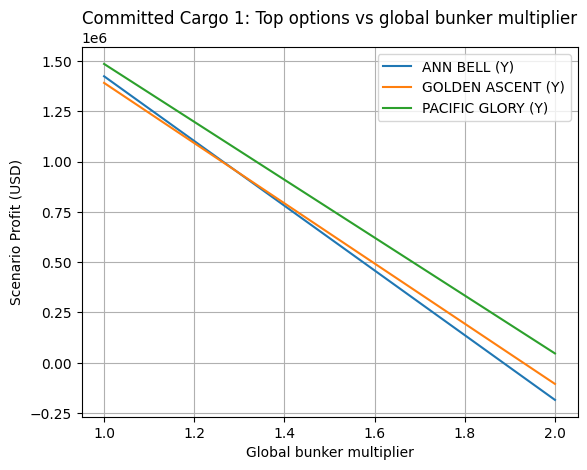

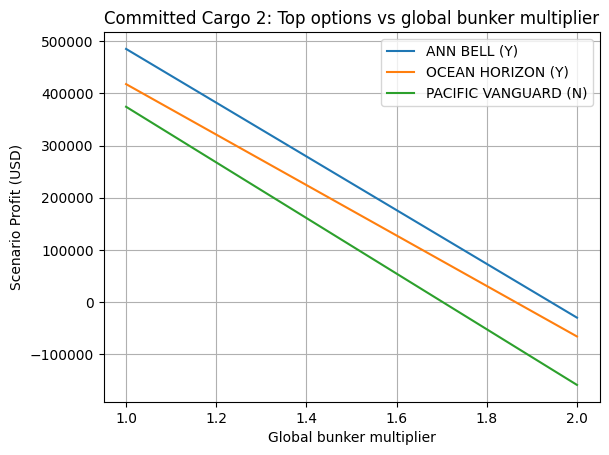

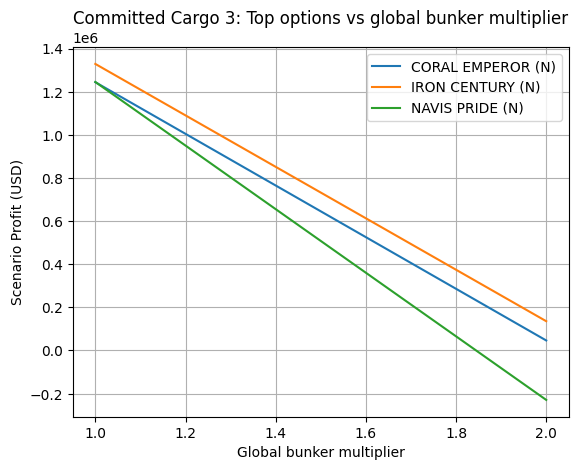

In [157]:
def build_committed_topk_curves(v2c_base: pd.DataFrame, cargo_num: int, top_k: int = 3,
                               mult_min=1.0, mult_max=2.0, step=0.01):
    base = v2c_base.copy()
    base = base[(base["Feasible"] == True) & (base["Cargo_Num"] == cargo_num)].copy()
    base = base[pd.notna(base["Profit_USD"])].copy()

    # Choose top K by BASE profit (at mult=1.0)
    base_top = base.nlargest(top_k, "Profit_USD").copy()

    # Identifier for each option (vessel + whether Cargill/market)
    base_top["Option_Label"] = base_top["Vessel Name"].astype(str) + " (" + base_top["Is_Cargill_Vessel"].astype(str) + ")"

    mults = np.round(np.arange(mult_min, mult_max + 1e-9, step), 4)
    curves = []

    for m in mults:
        scn = apply_global_bunker_mult_committed(base_top, float(m))
        scn = scn[["Cargo_Num","Option_Label","Profit_USD_Scn"]].copy()
        scn["bunker_mult"] = float(m)
        curves.append(scn)

    curves_df = pd.concat(curves, ignore_index=True)
    return curves_df


def plot_committed_curves(curves_df: pd.DataFrame, cargo_num: int):
    plt.figure()
    for label, g in curves_df.groupby("Option_Label"):
        plt.plot(g["bunker_mult"], g["Profit_USD_Scn"], label=label)

    plt.title(f"Committed Cargo {cargo_num}: Top options vs global bunker multiplier")
    plt.xlabel("Global bunker multiplier")
    plt.ylabel("Scenario Profit (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Run for Cargo 1/2/3
for c in [1, 2, 3]:
    curves_c = build_committed_topk_curves(v2c_long_base, cargo_num=c, top_k=3, step=0.01)
    plot_committed_curves(curves_c, cargo_num=c)


#### Function below to retrieve the overtake points for any of the 3 committed cargoes and its top 3 vessels

In [158]:
def cargo_switch_points(curves_df: pd.DataFrame):
    # for each bunker_mult, which option is best?
    best = (curves_df.sort_values("Profit_USD_Scn", ascending=False)
                    .groupby("bunker_mult", as_index=False)
                    .head(1)
                    .sort_values("bunker_mult"))
    best = best[["bunker_mult","Option_Label","Profit_USD_Scn"]].copy()

    # detect change
    best["prev_option"] = best["Option_Label"].shift(1)
    switches = best[best["Option_Label"] != best["prev_option"]].copy()
    return best, switches

for c in [1,2,3]:
    curves_c = build_committed_topk_curves(v2c_long_base, cargo_num=c, top_k=5, step=0.01)
    best_c, switches_c = cargo_switch_points(curves_c)
    print(f"\nCargo {c} switch points (top-5 baseline options):")
    display(switches_c)


Cargo 1 switch points (top-5 baseline options):


,bunker_mult,Option_Label,Profit_USD_Scn,prev_option
0,1.0,PACIFIC GLORY (Y),1.484950e+06,None



Cargo 2 switch points (top-5 baseline options):


,bunker_mult,Option_Label,Profit_USD_Scn,prev_option
0,1.0,ANN BELL (Y),485332.409067,None



Cargo 3 switch points (top-5 baseline options):


,bunker_mult,Option_Label,Profit_USD_Scn,prev_option
0,1.0,IRON CENTURY (N),1.328535e+06,None


### From th above result, we realised that all the top 1 remains the same despite any bunker cost increase. However, we realised that in 2 of the committed cargoes, the rank 2 and 3 cargoes have been changed when bunker cost increases so now the below function is just to help us find out their intersection.

In [159]:
def pairwise_intersections(curves_df: pd.DataFrame):
    """
    Find intersection points between every pair of Option_Label curves.
    Returns a DataFrame with columns:
      A, B, bunker_mult_intersection, Profit_USD_intersection
    """
    # Always return a DF with these columns (even if empty)
    out_cols = ["A", "B", "bunker_mult_intersection", "Profit_USD_intersection"]

    df = curves_df.copy()

    wide = df.pivot_table(
        index="bunker_mult",
        columns="Option_Label",
        values="Profit_USD_Scn",
        aggfunc="mean"
    ).sort_index()

    labels = list(wide.columns)
    xs = wide.index.to_numpy(dtype=float)

    rows = []

    for a, b in combinations(labels, 2):
        ya = wide[a].to_numpy(dtype=float)
        yb = wide[b].to_numpy(dtype=float)

        d = ya - yb
        s = np.sign(d)

        # exact zeros at grid points
        zero_idx = np.where(d == 0)[0]
        for i in zero_idx:
            rows.append({
                "A": a, "B": b,
                "bunker_mult_intersection": float(xs[i]),
                "Profit_USD_intersection": float(ya[i])
            })

        # sign changes between consecutive points => crossing
        idxs = np.where(s[:-1] * s[1:] < 0)[0]
        for i in idxs:
            x1, x2 = xs[i], xs[i + 1]
            d1, d2 = d[i], d[i + 1]

            x_star = x1 - d1 * (x2 - x1) / (d2 - d1)
            y_star = np.interp(x_star, xs, ya)

            rows.append({
                "A": a, "B": b,
                "bunker_mult_intersection": float(x_star),
                "Profit_USD_intersection": float(y_star)
            })

    if not rows:
        return pd.DataFrame(columns=out_cols)

    return (
        pd.DataFrame(rows)[out_cols]
          .sort_values(["A", "B", "bunker_mult_intersection"])
          .reset_index(drop=True)
    )


for c in [1,2,3]:
  curves_c = build_committed_topk_curves(v2c_long_base, cargo_num=c, top_k=3, step=0.01)
  inter = pairwise_intersections(curves_c)
  print(f"\nCargo {c} pairwise intersections among top-3:")
  display(inter)


Cargo 1 pairwise intersections among top-3:


,A,B,bunker_mult_intersection,Profit_USD_intersection
0,ANN BELL (Y),GOLDEN ASCENT (Y),1.292358,953363.905739



Cargo 2 pairwise intersections among top-3:


,A,B,bunker_mult_intersection,Profit_USD_intersection



Cargo 3 pairwise intersections among top-3:


,A,B,bunker_mult_intersection,Profit_USD_intersection
0,CORAL EMPEROR (N),NAVIS PRIDE (N),1.003451,1.239767e+06




---

#### After drawing the curve for part 1 of the answer, we are going to proceed to do it for part 2 to see how bunker price increase affects the way we choose which market cargoes should our **Remaining Cargil Vessel** should run.

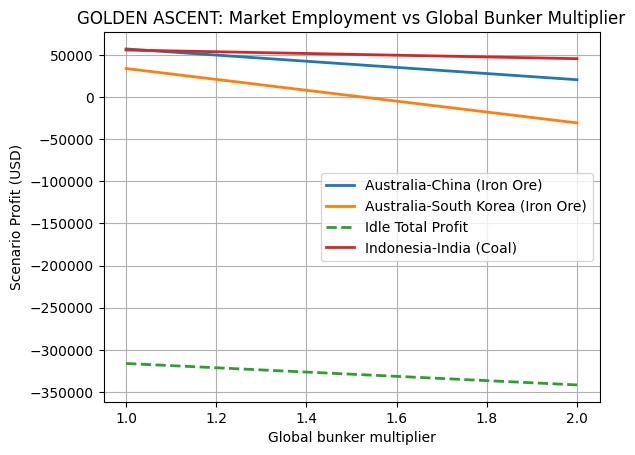

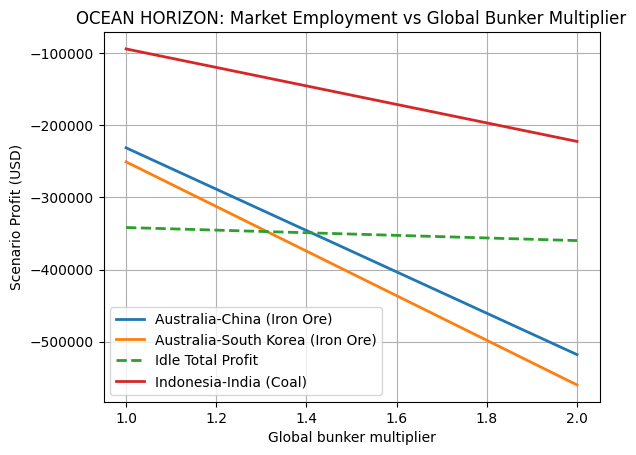

In [160]:
def build_market_topk_curves(
    market_base: pd.DataFrame,
    vessel_name: str,
    top_k: int = 3,
    mult_min=1.0, mult_max=2.0, step=0.01,
    add_idle_line: bool = True
):
    base = market_base.copy()
    base = base[(base["Is_Cargill_Vessel"] == "Y") & (base["Vessel Name"] == vessel_name)].copy()
    base = base[pd.notna(base["Market_Profit_USD"])].copy()

    # Choose what defines a "market option"
    if "Cargo_Route" in base.columns:
        opt_col = "Cargo_Route"
    elif "Cargo_Load_Port_NORM" in base.columns:
        opt_col = "Cargo_Load_Port_NORM"
    else:
        raise KeyError("No suitable market option column found (Cargo_Route / Cargo_Load_Port_NORM).")

    # Pick top K by BASE market profit
    base_top = base.nlargest(top_k, "Market_Profit_USD").copy()
    base_top["Option_Label"] = base_top[opt_col].astype(str)

    mults = np.round(np.arange(mult_min, mult_max + 1e-9, step), 4)
    curves = []

    # --- Market option curves ---
    for m in mults:
        scn = apply_global_bunker_mult_market(base_top, float(m))
        scn = scn[["Vessel Name", "Option_Label", "Market_Profit_USD_Scn"]].copy()
        scn = scn.rename(columns={"Market_Profit_USD_Scn": "Profit_USD_Scn"})
        scn["bunker_mult"] = float(m)
        curves.append(scn)

    # --- Idle baseline curve (same vessel, one line) ---
    if add_idle_line:
        # Get idle costs once per vessel (they should be constant per vessel)
        idle_cols_needed = ["Idle_Hire_Cost_USD", "Idle_Bunker_Cost_USD"]
        missing = [c for c in idle_cols_needed if c not in base.columns]
        if missing:
            raise KeyError(f"Missing idle columns for plotting: {missing}")

        # take first row (idle costs are vessel-level, not cargo-level)
        idle_hire = float(base["Idle_Hire_Cost_USD"].iloc[0])
        idle_bunker = float(base["Idle_Bunker_Cost_USD"].iloc[0])

        idle_rows = []
        for m in mults:
            idle_profit_scn = 0.0 - idle_hire - (idle_bunker * float(m))
            idle_rows.append({
                "Vessel Name": vessel_name,
                "Option_Label": "Idle Total Profit",
                "Profit_USD_Scn": idle_profit_scn,
                "bunker_mult": float(m)
            })

        curves.append(pd.DataFrame(idle_rows))

    curves_df = pd.concat(curves, ignore_index=True)
    return curves_df

def plot_market_curves(curves_df: pd.DataFrame, vessel_name: str):
    plt.figure()

    for label, g in curves_df.groupby("Option_Label"):
        if label == "Idle Total Profit":
            plt.plot(
                g["bunker_mult"],
                g["Profit_USD_Scn"],
                linestyle="--",          # dotted line
                linewidth=2,
                label=label
            )
        else:
            plt.plot(
                g["bunker_mult"],
                g["Profit_USD_Scn"],
                linewidth=2,
                label=label
            )

    plt.title(f"{vessel_name}: Market Employment vs Global Bunker Multiplier")
    plt.xlabel("Global bunker multiplier")
    plt.ylabel("Scenario Profit (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Choose which vessels to plot (all unique Cargill vessels in market_df_base)
vessels = sorted(market_df_base.loc[market_df_base["Is_Cargill_Vessel"]=="Y","Vessel Name"].unique().tolist())

# Plot for each vessel
for v in vessels:
    curves_v = build_market_topk_curves(market_df_base, vessel_name=v, top_k=3, step=0.01)
    plot_market_curves(curves_v, vessel_name=v)




---



###### Creating the function to check in all the graphs if are there any intersection points and its location
- Note that in the above graphs, the dotted line refers to how much money we lose if we were to just leave the vessel idle

In [161]:
def vessel_switch_points(curves_df: pd.DataFrame):
    best = (curves_df.sort_values("Profit_USD_Scn", ascending=False)
                    .groupby("bunker_mult", as_index=False)
                    .head(1)
                    .sort_values("bunker_mult"))
    best["prev_option"] = best["Option_Label"].shift(1)
    switches = best[best["Option_Label"] != best["prev_option"]].copy()
    return best[["bunker_mult","Option_Label","Profit_USD_Scn"]], switches[["bunker_mult","Option_Label","Profit_USD_Scn"]]

for v in vessels:
    curves_v = build_market_topk_curves(market_df_base, vessel_name=v, top_k=5, step=0.01)
    best_v, switches_v = vessel_switch_points(curves_v)
    print(f"\n{v} switch points (top-5 baseline options):")
    display(switches_v)



GOLDEN ASCENT switch points (top-5 baseline options):


,bunker_mult,Option_Label,Profit_USD_Scn
0,1.00,Australia-China (Iron Ore),57318.033336
26,1.05,Indonesia-India (Coal),55498.647127



OCEAN HORIZON switch points (top-5 baseline options):


,bunker_mult,Option_Label,Profit_USD_Scn
0,1.0,Indonesia-India (Coal),-94052.069115


From the above result this means that as soon as the bunker price globally increases by 5%, then the Cargill Vessel 'Golden Ascent', should take a different market cargo route that goes from Indonesia-India and transport the Coal.



---



###### We notice that for the second graph there is an intersection point between the Idle line and the profit for running those voyage. This intersection point highlights crucial information where if the bunker increases by that specific multiplier, the two market cargoes are no longer `worth doing` and we should just focus on doing the first market cargo only. Therefore, this code below aims to help us find their intersection points

In [162]:
def market_idle_intersections(curves_df: pd.DataFrame, idle_label: str = "Idle Total Profit"):
    idle = curves_df[curves_df["Option_Label"] == idle_label].copy()
    if idle.empty:
        raise ValueError(f"Idle line '{idle_label}' not found in curves_df.")

    idle = (
        idle.sort_values("bunker_mult")[["bunker_mult","Profit_USD_Scn"]]
            .rename(columns={"Profit_USD_Scn": "idle_profit"})
            .drop_duplicates(subset=["bunker_mult"])
    )

    out_rows = []

    for opt, g in curves_df.groupby("Option_Label"):
        if opt == idle_label:
            continue

        g = (
            g.sort_values("bunker_mult")[["bunker_mult","Profit_USD_Scn"]]
             .rename(columns={"Profit_USD_Scn": "mkt_profit"})
             .drop_duplicates(subset=["bunker_mult"])
        )

        merged = pd.merge(g, idle, on="bunker_mult", how="inner").sort_values("bunker_mult")
        if len(merged) < 2:
            continue

        # difference array
        d = (merged["mkt_profit"] - merged["idle_profit"]).to_numpy()

        # sign changes (handle exact zeros too)
        s = np.sign(d)
        # If any point is exactly 0, that's an intersection at that exact bunker_mult
        zero_idx = np.where(d == 0)[0]
        for i in zero_idx:
            out_rows.append({
                "Option_Label": opt,
                "bunker_mult_intersection": float(merged["bunker_mult"].iloc[i]),
                "Profit_USD_intersection": float(merged["idle_profit"].iloc[i]),
            })

        # sign change between consecutive points => crossing
        idxs = np.where(s[:-1] * s[1:] < 0)[0]

        for i in idxs:
            x1 = float(merged["bunker_mult"].iloc[i])
            x2 = float(merged["bunker_mult"].iloc[i + 1])
            y1 = float(d[i])
            y2 = float(d[i + 1])

            # Linear interpolation for x where diff = 0
            x_star = x1 - y1 * (x2 - x1) / (y2 - y1)

            # Profit at intersection is idle profit (same as market profit at that point)
            idle_star = np.interp(
                x_star,
                merged["bunker_mult"].to_numpy(dtype=float),
                merged["idle_profit"].to_numpy(dtype=float),
            )

            out_rows.append({
                "Option_Label": opt,
                "bunker_mult_intersection": float(x_star),
                "Profit_USD_intersection": float(idle_star)
            })

    return (
        pd.DataFrame(out_rows)
          .sort_values(["Option_Label","bunker_mult_intersection"])
          .reset_index(drop=True)
    )

In [163]:
inter_v = market_idle_intersections(curves_v)
display(inter_v)


,Option_Label,bunker_mult_intersection,Profit_USD_intersection
0,Australia-China (Iron Ore),1.411476,-349072.181726
1,Australia-South Korea (Iron Ore),1.312628,-347281.441612




---



# Chatbot Example Prompts & Answers

## Prompt 1 : “Lets say we have a worse case scenario where the bunker price at all ports increased. How much would the bunker price at all ports have to increase before the current recommendation becomes no longer optimal?”

## Response:

### “The scenario analysis I have done involved running multiple iterations using a bunker price multiplier ranging from 1.00 to 2.00 with increments of 0.01. For the first part of the recommendation—assigning three committed cargoes to vessels to maximise profit—the optimal assignment (Rank 1) remained consistently stable across all three committed cargoes. This shows that the current recommendation is robust against an increase in bunker prices.

### However, I observed a positional swap in the Rank 2 and Rank 3 vessels for committed cargoes 1 and 3 when the bunker price increased by 1.292x and 1.003x respectively. This shows that these specific cargo and vessel matchings have narrow profit margins that are highly sensitive to bunker price changes.

### Since the optimal assignments for the three committed cargoes remained stable, I focused on the second scenario analysis on the 2 remaining Cargill idle vessels (Ocean Horizon and Golden Ascent) and their interaction with the other 8 market cargoes. Similarly, I tested how a change in bunker prices would affect the profitability of these additional opportunities. The analysis shows that if bunker prices rise by 1.05x, then the Golden Ascent vessel should switch from the customer Rio Tinto (Australia-China) to the customer Adaro (Indonesia-India). At this threshold, the profit from the Adaro cargo begins to exceed that of Rio Tinto. For the Ocean Horizon, Adaro’s cargo (Indonesia-India) remains the most ideal cargo assignment even as bunker prices rise. Although this vessel already operates at a loss under baseline bunker prices, this specific cargo pairing serves as the most effective loss-mitigation strategy. By selecting this route, we ensure that financial losses are kept to a minimum, as all alternative market routes would result in significantly higher deficits."


## Prompt 2: "In a high bunker price environment, is it financially justifiable to keep the remaining Cargill vessels idle, or should they be deployed even if the voyage results in a net loss?"

## Response:
###"My analysis indicates that keeping the remaining vessels idle is the least financially viable option, even under extreme bunker price scenarios.

###Golden Ascent: Regardless of bunker price increments, this vessel should remain deployed. The revenue generated consistently offsets more costs than an idle state would, even as margins reduce.

###Ocean Horizon: At bunker price multipliers of 1.31x and 1.41x, we identify thresholds where two of the available routes become significantly less viable.  Running these routes will result in a loss greater than that of an idle vessel. However, the primary route Adaro (Indonesia-India) remains the optimal choice.

###Financial Rationale: The fundamental objective in a high-cost environment is loss minimization. While certain voyages may show a negative net profit at high bunker prices, the loss incurred by carrying cargo is substantially lower than the fixed cost loss incurred by leaving a vessel at anchor most of the time. By continuing operations, the vessel generates revenue that contributes toward its daily operating expenses, whereas an idle vessel generates zero revenue while its fixed costs remain constant.

###Therefore, the strategically sound decision is to maintain deployment on high-efficiency routes to maximize cost absorption."
